In [41]:
import numpy as np
import os
from scipy import stats
import pandas as pd
from numpy import loadtxt
import json
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import scipy.stats as st
from scipy.stats import kstest, mannwhitneyu, wilcoxon, chisquare, spearmanr
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from imagedata import Series

In [42]:
# Set font family globally
plt.rcParams['font.family'] = 'Times New Roman'

#legend_fontsize = 15
label_fontsize = 15
title_fontsize = 17
tick_size=13

In [43]:
#source code: https://rowannicholls.github.io/python/statistics/agreement/bland_altman.html
def bland_altman_plot(data1, data2, right_coord): 
    x = np.asarray(data1)
    y = np.asarray(data2)
    means = (x + y) / 2
    diffs = x - y
    
    # Average difference (aka the bias)
    bias = np.mean(diffs)
    bias_percent = (diffs)/(means) * 100
    print('Bias percent:', np.mean(bias_percent))
    # Sample standard deviation
    s = np.std(diffs, ddof=1)  # Use ddof=1 to get the sample standard deviation
    
    # Limits of agreement (LOAs)
    upper_loa = bias + 1.96 * s
    lower_loa = bias - 1.96 * s
    
    # Confidence level
    C = 0.95  # 95%
    # Significance level, α
    alpha = 1 - C
    # Number of tails
    tails = 2
    # Quantile (the cumulative probability)
    q = 1 - (alpha / tails)
    # Critical z-score, calculated using the percent-point function (aka the
    # quantile function) of the normal distribution
    z_star = st.norm.ppf(q)

    #print(f'95% of normally distributed data lies within {z_star} σ of the mean')
    
    # Limits of agreement (LOAs)
    loas = (bias - z_star * s, bias + z_star * s)
    #print(f'The limits of agreement are {loas} L/min')
    
    # Limits of agreement (LOAs)
    loas = st.norm.interval(C, bias, s)
    
    # Create plot
    ax = plt.axes()
    plt.rcParams['font.family'] = 'Times New Roman'
    ax.scatter(means, diffs)
    # Plot the zero line
    ax.axhline(y=0, c='grey', lw=0.5)
    # Plot the bias and the limits of agreement
    ax.axhline(y=loas[1], c='grey', ls='--')
    ax.axhline(y=bias, c='grey', ls='--')
    ax.axhline(y=loas[0], c='grey', ls='--')
    # Labels
    #ax.set_title('Bland-Altman Plot', size=17)
    ax.set_xlabel('Mean [$min^{-1}$]', size=14)
    ax.set_ylabel('Difference [$min^{-1}$]', size=14)
    # Get axis limits
    left, right = ax.get_xlim()
    bottom, top = ax.get_ylim()
    # Set y-axis limits
    max_y = max(abs(bottom), abs(top))
    ax.set_ylim(-max_y * 1.1, max_y * 1.1)
    # Set x-axis limits
    domain = right - left
    ax.set_xlim(left, left + domain * 1.1)
    
    # Annotations
    ax.annotate('+LoA', (right_coord, upper_loa), (0, 5), textcoords='offset points', annotation_clip = False, fontsize=13)
    ax.annotate(f'{upper_loa:+0.4f}', (right_coord, upper_loa), (0, -10), textcoords='offset points', annotation_clip = False, fontsize=13)
    ax.annotate('Bias', (right_coord, bias), (0, 5), textcoords='offset pixels', annotation_clip = False, fontsize=13)
    ax.annotate(f'{bias:+0.4f}', (right_coord, bias), (0, -10), textcoords='offset points', annotation_clip = False, fontsize=13)
    ax.annotate('-LoA', (right_coord, lower_loa), (0, 5), textcoords='offset points', annotation_clip = False, fontsize=13)
    ax.annotate(f'{lower_loa:+0.4f}', (right_coord, lower_loa), (0, -10), textcoords='offset points', annotation_clip = False, fontsize=13)

Median Kt: 0.1317222825491492 0.046563269439565375 0.41303666075351897
Median kep: 0.5800707564217726 0.04656326943956549 1.9743097415245023
Median ve: 0.26479007698007223 0.0814138801861788 0.9999999999999974
Median vp: 0.20571558694443606 0.07399486031467323 0.330509445992213
Average
Kt: 0.15997252757873934 std: 0.08652419680852172
kep: 0.7774716588483377 std: 0.5896911261390789
ve: 0.3030188264835191 std: 0.20130941048917084
vp: 0.18173666085581505 std: 0.07560918639541485
Voxelwise
Kt: 0.1602612305361269 std: 0.07969417516925828
kep: 0.7554605710871084 std: 0.44325366185117937
ve 0.33188349196409045 std: 0.16755718443003545
vp 0.18213750568318415 std: 0.07548400510148272
Difference
Kt: 0.0002887029573875599 Percent: 0.18030763470227498
kep: 0.022011087761229287 Percent: 2.8717626691372007
ve: 0.028864665480571372 Percent: 9.092631934672392
vp: 0.0004008448273691012 Percent: 0.2203205746545569
Bias percent: -3.4993732754989075


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


ConfidenceInterval(low=0.8910569060489169, high=0.9829384864359132)
PearsonRResult(statistic=0.9564419256984159, pvalue=4.575460693565861e-11)
Data is not normally distributed
K-S statistic: 0.5185693464996767
p-value: 1.584187396017038e-05
Wilcoxon p-value: 0.2942523956298828
Bias percent: -11.131185053477534


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


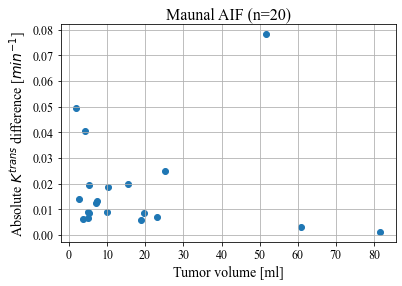

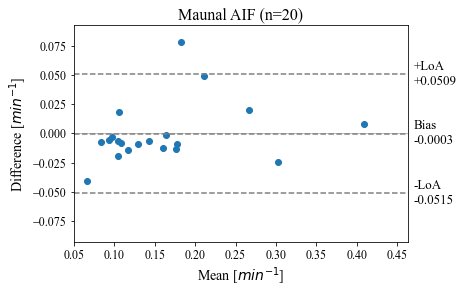

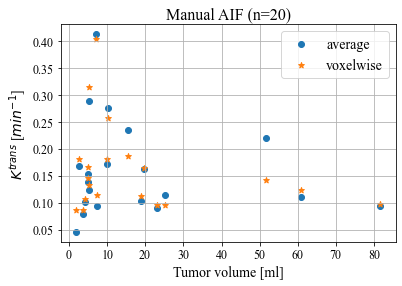

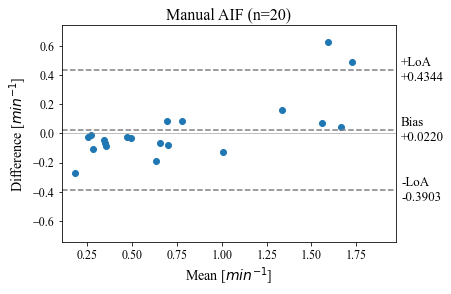

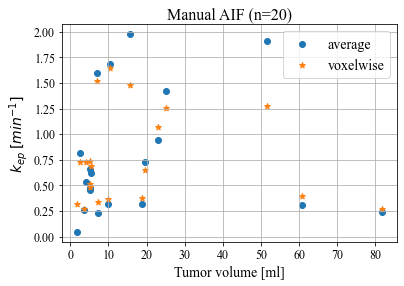

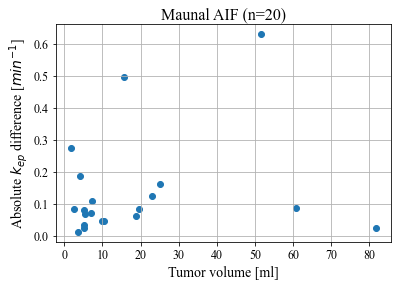

In [122]:
#Manual AIF
'''
Plotting the difference in Ktrans values from average and voxelwise modelling versus the tumor volume
'''
f_avr = open('H:/data/Results/ManualAIF/output_average.json')
f_vox = open('H:/data/Results/ManualAIF/output_voxelwise.json')

avr_data = json.load(f_avr)
vox_data = json.load(f_vox)

Kt_diff = []
Kt_avrg = []
Kt_voxel = []
kep_avrg = []
kep_voxel = []
ve_avrg = []
ve_voxel = []
vp_avrg = []
vp_voxel = []
tumor_vol = []

for i in range(0,len(vox_data)): 
    tumor_vol.append(avr_data[i]['tumor_volume'])
    Kt_avrg.append(avr_data[i]['Ktrans']*60)
    Kt_voxel.append(vox_data[i]['Ktrans']*60)
    diff = abs(vox_data[i]['Ktrans']*60 - avr_data[i]['Ktrans']*60)
    Kt_diff.append(diff)
    kep_avrg.append(avr_data[i]['kep']*60)
    kep_voxel.append(vox_data[i]['kep']*60)
    ve_avrg.append(avr_data[i]['ve'])
    ve_voxel.append(vox_data[i]['ve'])
    vp_avrg.append(avr_data[i]['vp'])
    vp_voxel.append(vox_data[i]['vp'])

print('Median Kt:', np.median(Kt_avrg), min(Kt_avrg), max(Kt_avrg))
print('Median kep:', np.median(kep_avrg), min(kep_avrg), max(kep_avrg))
print('Median ve:', np.median(ve_avrg), min(ve_avrg), max(ve_avrg))
print('Median vp:', np.median(vp_avrg), min(vp_avrg), max(vp_avrg))
    
vol_arr = np.array(tumor_vol)*0.001 #fra mm^3 til ml
sort_vol = np.sort(vol_arr)
sort_index = np.argsort(vol_arr)

res = [val for (_, val) in sorted(zip(sort_index, Kt_diff), key=lambda x: x[0])]

fig1 = plt.figure(1)
plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(sort_vol, res)
plt.xlabel('Tumor volume [ml]', size=label_fontsize)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.ylabel('Absolute $K^{trans}$ difference [$min^{-1}$]', size=label_fontsize)
plt.title('Maunal AIF (n=20)', size=title_fontsize)
plt.grid()
fig1.savefig('H:/data/Results/ManualAIF/tumorvol_vs_Ktdiff_manualAIF.eps', bbox_inches='tight')

max_Ktrans_diff = np.array(Kt_diff).max()
min_Ktrans_diff = np.array(Kt_diff).min()
print('Average')
print('Kt:', np.array(Kt_avrg).mean(), 'std:', np.array(Kt_avrg).std())
print('kep:', np.array(kep_avrg).mean(), 'std:', np.array(kep_avrg).std())
print('ve:', np.array(ve_avrg).mean(), 'std:', np.array(ve_avrg).std())
print('vp:', np.array(vp_avrg).mean(), 'std:', np.array(vp_avrg).std()) 
print('Voxelwise')      
print('Kt:', np.array(Kt_voxel).mean(), 'std:', np.array(Kt_voxel).std())
print('kep:', np.array(kep_voxel).mean(), 'std:', np.array(kep_voxel).std())
print('ve', np.array(ve_voxel).mean(), 'std:', np.array(ve_voxel).std())
print('vp', np.array(vp_voxel).mean(), 'std:', np.array(vp_voxel).std())
print('Difference')
print('Kt:', abs(np.array(Kt_avrg).mean() - np.array(Kt_voxel).mean()), 'Percent:', ((abs(np.array(Kt_avrg).mean() - np.array(Kt_voxel).mean()))/((np.array(Kt_avrg).mean() + np.array(Kt_voxel).mean())/2) * 100))
print('kep:', abs(np.array(kep_avrg).mean() - np.array(kep_voxel).mean()), 'Percent:', ((abs(np.array(kep_avrg).mean() - np.array(kep_voxel).mean()))/((np.array(kep_avrg).mean() + np.array(kep_voxel).mean())/2) * 100))
print('ve:', abs(np.array(ve_avrg).mean() - np.array(ve_voxel).mean()), 'Percent:', ((abs(np.array(ve_avrg).mean() - np.array(ve_voxel).mean()))/((np.array(ve_avrg).mean() + np.array(ve_voxel).mean())/2) * 100))
print('vp:',  abs(np.array(vp_avrg).mean() - np.array(vp_voxel).mean()), 'Percent:', ((abs(np.array(vp_avrg).mean() - np.array(vp_voxel).mean()))/((np.array(vp_avrg).mean() + np.array(vp_voxel).mean())/2) * 100))

#Bland-Altman 
fig2 = plt.figure(2)
bland_altman_plot(Kt_avrg, Kt_voxel, 0.47)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.title('Maunal AIF (n=20)', size=title_fontsize)
fig2.savefig('H:/data/Results/ManualAIF/Bland_altman_manualAIF.eps', bbox_inches='tight')

#Pearson correlation 
pearson = stats.pearsonr(np.asarray(Kt_avrg), np.asarray(Kt_voxel))
print(pearson.confidence_interval())
print(pearson)

#Kolmogorov-Smirnov to test if the data is normally distributed 
ks_result = kstest(Kt_avrg, cdf = 'norm')
if ks_result[1] > 0.05: #t-test if the data is normally distributed 
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    t_test = stats.ttest_rel(np.asarray(Kt_avrg), np.asarray(Kt_voxel))
    print(t_test)
else: 
    print('Data is not normally distributed')
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    res  = wilcoxon(np.array(Kt_avrg), np.array(Kt_voxel))
    print('Wilcoxon p-value:', res.pvalue)
    
#Ktrans against tumor volume
fig3 = plt.figure(3)
plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(vol_arr, Kt_avrg, label='average', color='tab:blue')
plt.scatter(vol_arr, Kt_voxel, label='voxelwise', color='tab:orange', marker='*')
plt.legend(fontsize=label_fontsize)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlabel('Tumor volume [ml]', size=label_fontsize)
plt.ylabel('$K^{trans}$ [$min^{-1}$]', size=label_fontsize)
plt.title('Manual AIF (n=20)', size=title_fontsize)
#plt.ylim(0,0.05)
plt.grid()
fig3.savefig('H:/data/Results/ManualAIF/ktrans_vs_tumorvol_manAIF_new.eps', bbox_inches='tight')

fig4 = plt.figure(4)
bland_altman_plot(kep_avrg, kep_voxel, 2)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.title('Manual AIF (n=20)', size=title_fontsize)
fig4.savefig('H:/data/Results/ManualAIF/Bland_altman_manualAIF_kep.eps', bbox_inches='tight')

fig5 = plt.figure(5)
plt.scatter(vol_arr, kep_avrg, label='average', color='tab:blue')
plt.scatter(vol_arr, kep_voxel, label='voxelwise', color='tab:orange', marker='*')
plt.legend(fontsize=label_fontsize)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlabel('Tumor volume [ml]', size=label_fontsize)
plt.ylabel('$k_{ep}$ $[min^{-1}]$', size=label_fontsize)
plt.title('Manual AIF (n=20)', size=title_fontsize)
#plt.ylim(0,0.05)
plt.grid()
fig5.savefig('H:/data/Results/manualAIF/kep_vs_tumorvol_manAIF.eps', bbox_inches='tight')

kep_diff = abs(np.asarray(kep_avrg) - np.asarray(kep_voxel))
fig6 = plt.figure(6)
plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(vol_arr, kep_diff)
plt.xlabel('Tumor volume [ml]', size=label_fontsize)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.ylabel('Absolute $k_{ep}$ difference [$min^{-1}$]', size=label_fontsize)
plt.title('Maunal AIF (n=20)', size=title_fontsize)
plt.grid()
fig6.savefig('H:/data/Results/ManualAIF/tumorvol_vs_kepdiff_manualAIF.eps', bbox_inches='tight')


In [124]:
#Kolmogorov-Smirnov to test if the data is normally distributed 
ks_result = kstest(Kt_avrg, cdf = 'norm')
if ks_result[1] > 0.05: #t-test if the data is normally distributed 
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    t_test = stats.ttest_rel(Kt_avrg, Kt_voxel)
    print(t_test)
else: 
    print('Data is not normally distributed')
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    #mann_whitney = mannwhitneyu(np.array(Kt_avrg), np.array(Kt_voxel))
    #print(mann_whitney)
    res  = wilcoxon(Kt_avrg, Kt_voxel)
    print('Wilcoxon p-value:', res.pvalue)
    print('Wilcoxon z-statistic:', res.statistic)

Data is not normally distributed
K-S statistic: 0.5185693464996767
p-value: 1.584187396017038e-05
Wilcoxon p-value: 0.2942523956298828
Wilcoxon z-statistic: 76.0


In [45]:
#Pearson correlation 
pearson = stats.pearsonr(np.asarray(Kt_avrg), np.asarray(Kt_voxel))
print(pearson)
print()
#Spearman correlation 
spearman = stats.spearmanr(np.asarray(Kt_avrg), np.asarray(Kt_voxel))
print(spearman)

PearsonRResult(statistic=0.9564419256984159, pvalue=4.575460693565861e-11)

SpearmanrResult(correlation=0.9338345864661652, pvalue=1.8126865423587107e-09)


Median Kt: 0.10207741898103206 0.042126697789076836 0.2397728271295572
Median kep: 0.42841725883358966 0.08812941850045812 1.9669662234571743
Median ve: 0.248447985069993 0.0500489006537211 0.9999999999990993
Median vp: 0.20754661542654224 0.06449801603630007 0.3747010483156715
0.10207741898103206
Average
Kt: 0.12251988613203077 std: 0.05162046010824714
kep: 0.6472784983656474 std: 0.5043915445185894
ve: 0.27451446928034573 std: 0.19495051799844051
vp: 0.19260642565858516 std: 0.08206557108972806
Voxelwise
Kt: 0.13364632570417376 std: 0.05412954763582606
kep: 0.8391827273298643 std: 0.5022515180652821
ve 0.31071349854677605 std: 0.15266225730421593
vp 0.19362943289543627 std: 0.0811472929360416
Difference
Kt: 0.011126439572142988 Percent: 8.686890821696153
kep: 0.19190422896421688 Percent: 25.82028049529853
ve: 0.036199029266430316 Percent: 12.370915696607183
vp: 0.0010230072368511145 Percent: 0.5297318797281119
Bias percent: -9.014019182106079


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Median Kt avrg: 0.10207741898103206
Median Kt voxel: 0.11743433010806661
Data is not normally distributed
K-S statistic: 0.5168011513500332
p-value: 1.724389198237907e-05
Wilcoxon p-value: 0.03276824951171875
Bias percent: -32.41211476721001


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


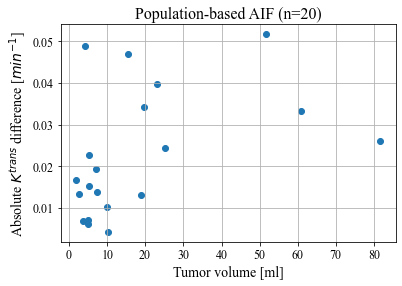

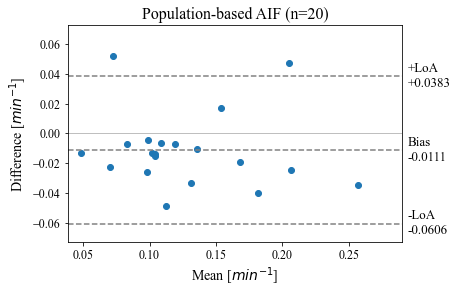

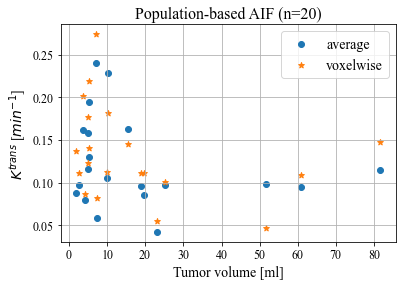

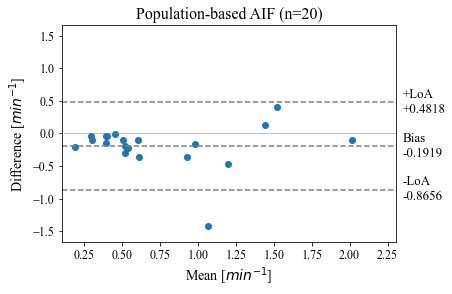

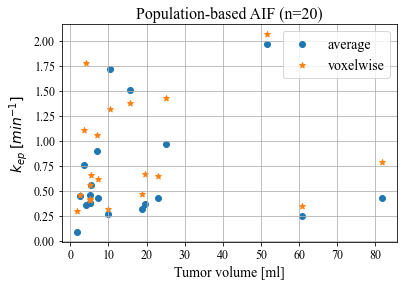

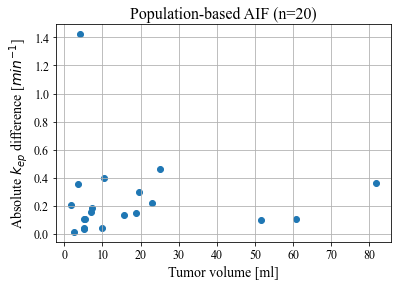

In [125]:
#Population-based AIF
'''
Plotting the difference in Ktrans values from average and voxelwise modelling versus the tumor volume
'''
f_avr = open('H:/data/Results/PopAIF/output_average.json')
f_vox = open('H:/data/Results/PopAIF/output_voxelwise.json')

avr_data = json.load(f_avr)
vox_data = json.load(f_vox)

Kt_diff = []
Kt_avrg = []
Kt_voxel = []
kep_avrg = []
kep_voxel = []
ve_avrg = []
ve_voxel = []
vp_avrg = []
vp_voxel = []
tumor_vol = []

for i in range(0,len(vox_data)): 
    tumor_vol.append(vox_data[i]['tumor_volume'])
    Kt_avrg.append(avr_data[i]['Ktrans']*60)
    Kt_voxel.append(vox_data[i]['Ktrans']*60)
    diff = abs(vox_data[i]['Ktrans']*60 - avr_data[i]['Ktrans']*60)
    Kt_diff.append(diff)
    kep_avrg.append(avr_data[i]['kep']*60)
    kep_voxel.append(vox_data[i]['kep']*60)
    ve_avrg.append(avr_data[i]['ve'])
    ve_voxel.append(vox_data[i]['ve'])
    vp_avrg.append(avr_data[i]['vp'])
    vp_voxel.append(vox_data[i]['vp'])

    
print('Median Kt:', np.median(Kt_avrg), min(Kt_avrg), max(Kt_avrg))
print('Median kep:', np.median(kep_avrg), min(kep_avrg), max(kep_avrg))
print('Median ve:', np.median(ve_avrg), min(ve_avrg), max(ve_avrg))
print('Median vp:', np.median(vp_avrg), min(vp_avrg), max(vp_avrg))
    
vol_arr = np.array(tumor_vol)
sort_vol = np.sort(vol_arr)
sort_index = np.argsort(vol_arr)

res = [val for (_, val) in sorted(zip(sort_index, Kt_diff), key=lambda x: x[0])]

fig1 = plt.figure(1)
plt.rcParams.update({'font.family':'Times New Roman'})
plt.scatter(sort_vol, res)
plt.xlabel('Tumor volume [ml]', size=label_fontsize)
plt.ylabel('Absolute $K^{trans}$ difference [$min^{-1}$]', size=label_fontsize)
plt.title('Population-based AIF (n=20)', size=title_fontsize)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.grid()
fig1.savefig('H:/data/Results/PopAIF/tumorvol_vs_Ktdiff_popAIF.eps', bbox_inches='tight')

max_Ktrans_diff = np.array(Kt_diff).max()
min_Ktrans_diff = np.array(Kt_diff).min()
print(np.median(Kt_avrg))
print('Average')
print('Kt:', np.array(Kt_avrg).mean(), 'std:', np.array(Kt_avrg).std())
print('kep:', np.array(kep_avrg).mean(), 'std:', np.array(kep_avrg).std())
print('ve:', np.array(ve_avrg).mean(), 'std:', np.array(ve_avrg).std())
print('vp:', np.array(vp_avrg).mean(), 'std:', np.array(vp_avrg).std()) 
print('Voxelwise')      
print('Kt:', np.array(Kt_voxel).mean(), 'std:', np.array(Kt_voxel).std())
print('kep:', np.array(kep_voxel).mean(), 'std:', np.array(kep_voxel).std())
print('ve', np.array(ve_voxel).mean(), 'std:', np.array(ve_voxel).std())
print('vp', np.array(vp_voxel).mean(), 'std:', np.array(vp_voxel).std())
print('Difference')
print('Kt:', abs(np.array(Kt_avrg).mean() - np.array(Kt_voxel).mean()), 'Percent:', ((abs(np.array(Kt_avrg).mean() - np.array(Kt_voxel).mean()))/((np.array(Kt_avrg).mean() + np.array(Kt_voxel).mean())/2) * 100))
print('kep:', abs(np.array(kep_avrg).mean() - np.array(kep_voxel).mean()), 'Percent:', ((abs(np.array(kep_avrg).mean() - np.array(kep_voxel).mean()))/((np.array(kep_avrg).mean() + np.array(kep_voxel).mean())/2) * 100))
print('ve:', abs(np.array(ve_avrg).mean() - np.array(ve_voxel).mean()), 'Percent:', ((abs(np.array(ve_avrg).mean() - np.array(ve_voxel).mean()))/((np.array(ve_avrg).mean() + np.array(ve_voxel).mean())/2) * 100))
print('vp:',  abs(np.array(vp_avrg).mean() - np.array(vp_voxel).mean()), 'Percent:', ((abs(np.array(vp_avrg).mean() - np.array(vp_voxel).mean()))/((np.array(vp_avrg).mean() + np.array(vp_voxel).mean())/2) * 100))

#Bland-Altman 
fig2 = plt.figure(2)
bland_altman_plot(Kt_avrg, Kt_voxel, 0.294)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.title('Population-based AIF (n=20)', size=title_fontsize)
fig2.savefig('H:/data/Results/PopAIF/Bland_altman_popAIF.eps', bbox_inches='tight')

#Pearson correlation 
#pearson = stats.pearsonr(np.asarray(Kt_avrg), np.asarray(Kt_voxel))
#print(pearson.confidence_interval())
#print(pearson)

print('Median Kt avrg:', np.median(Kt_avrg))
print('Median Kt voxel:', np.median(Kt_voxel))

#Kolmogorov-Smirnov to test if the data is normally distributed 
ks_result = kstest(Kt_avrg, cdf = 'norm')
if ks_result[1] > 0.05: #t-test if the data is normally distributed 
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    t_test = stats.ttest_rel(np.asarray(Kt_avrg), np.asarray(Kt_voxel))
    print(t_test)
else: # Wilcoxon signed-rank test if data is not normally distributed
    print('Data is not normally distributed')
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    res  = wilcoxon(np.array(Kt_avrg), np.array(Kt_voxel))
    print('Wilcoxon p-value:', res.pvalue)

#Ktrans against tumor volume
fig3 = plt.figure(3)
plt.rcParams.update({'font.family':'Times New Roman'})
plt.scatter(tumor_vol, Kt_avrg, label='average', color='tab:blue')
plt.scatter(tumor_vol, Kt_voxel, label='voxelwise', color='tab:orange', marker='*')
plt.legend(fontsize=label_fontsize)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlabel('Tumor volume [ml]', size=label_fontsize)
plt.ylabel('$K^{trans}$ [$min^{-1}$]', size=label_fontsize)
plt.title('Population-based AIF (n=20)', size=title_fontsize)
plt.grid()
#plt.ylim(0,0.05)
fig3.savefig('H:/data/Results/PopAIF/ktrans_vs_tumorvol_popAIF.eps', bbox_inches='tight')

fig4 = plt.figure(4)
bland_altman_plot(kep_avrg, kep_voxel, 2.35)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.title('Population-based AIF (n=20)', size=title_fontsize)
fig4.savefig('H:/data/Results/PopAIF/Bland_altman_popAIF_kep.eps', bbox_inches='tight')

fig5 = plt.figure(5)
plt.rcParams.update({'font.family':'Times New Roman'})
plt.scatter(tumor_vol, kep_avrg, label='average', color='tab:blue')
plt.scatter(tumor_vol, kep_voxel, label='voxelwise', color='tab:orange', marker='*')
plt.legend(fontsize=label_fontsize)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlabel('Tumor volume [ml]', size=label_fontsize)
plt.ylabel('$k_{ep}$ $[min^{-1}]$', size=label_fontsize)
plt.title('Population-based AIF (n=20)', size=title_fontsize)
#plt.ylim(0,0.05)
plt.grid()
fig5.savefig('H:/data/Results/PopAIF/kep_vs_tumorvol_popAIF.eps', bbox_inches='tight')

kep_diff = abs(np.asarray(kep_avrg) - np.asarray(kep_voxel))
fig6 = plt.figure(6)
plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(vol_arr, kep_diff)
plt.xlabel('Tumor volume [ml]', size=label_fontsize)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.ylabel('Absolute $k_{ep}$ difference [$min^{-1}$]', size=label_fontsize)
plt.title('Population-based AIF (n=20)', size=title_fontsize)
plt.grid()
fig6.savefig('H:/data/Results/PopAIF/tumorvol_vs_kepdiff_popAIF.eps', bbox_inches='tight')

In [126]:
#Kolmogorov-Smirnov to test if the data is normally distributed 
ks_result = kstest(Kt_avrg, cdf = 'norm')
if ks_result[1] > 0.05: #t-test if the data is normally distributed 
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    t_test = stats.ttest_rel(Kt_avrg, Kt_voxel)
    print(t_test)
else: 
    print('Data is not normally distributed')
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    #mann_whitney = mannwhitneyu(np.array(Kt_avrg), np.array(Kt_voxel))
    #print(mann_whitney)
    res  = wilcoxon(Kt_avrg, Kt_voxel)
    print('Wilcoxon p-value:', res.pvalue)
    print('Wilcoxon z-statistic:', res.statistic)

Data is not normally distributed
K-S statistic: 0.5168011513500332
p-value: 1.724389198237907e-05
Wilcoxon p-value: 0.03276824951171875
Wilcoxon z-statistic: 48.0


In [21]:
#Pearson correlation 
pearson = stats.pearsonr(np.asarray(Kt_avrg), np.asarray(Kt_voxel))
print(pearson)
print()
#Spearman correlation 
spearman = stats.spearmanr(np.asarray(Kt_avrg), np.asarray(Kt_voxel))
print(spearman)

PearsonRResult(statistic=0.8928837780638228, pvalue=1.1882810597977096e-07)

SpearmanrResult(correlation=0.849624060150376, pvalue=2.1348703463412614e-06)


(array([2., 1., 7., 3., 1., 1., 2., 1., 0., 2.]),
 array([0.0421267 , 0.06189131, 0.08165592, 0.10142054, 0.12118515,
        0.14094976, 0.16071438, 0.18047899, 0.2002436 , 0.22000821,
        0.23977283]),
 <BarContainer object of 10 artists>)

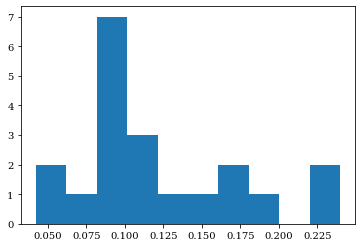

In [31]:
plt.hist(Kt_avrg)

In [ ]:
fig4 = plt.figure(4)
bland_altman_plot(kep_avrg, kep_voxel)
fig4.savefig('H:/data/Results/PopAIF/Bland_altman_popAIF_kep.eps', bbox_inches='tight')

Median Kt: 0.1417127094589002 -0.02213909569795426 2.8659399572701507
Median kep: 0.771887358254332 -0.7010788740489958 5.360982207160625
Median ve: 0.17999571234102665 0.0002508790265963314 0.9999999999953496
Median vp: 0.3938697979367327 0.0524922444893312 0.7839881781608253
Average
Kt: 0.521002566044419 std: 0.798924519301584
kep: 1.1930254350510805 std: 1.5572235318686396
ve: 0.3510545867721372 std: 0.3413431446383317
vp: 0.36886757598747066 std: 0.17500063836598048
Voxelwise
Kt: 0.524533617527995 std: 0.779313788966545
kep: 3.068576258553072 std: 4.469919134182531
ve 0.4034756724766296 std: 0.26243834785920994
vp 0.3666488737013417 std: 0.17873507732026933
Difference
Kt: 0.00353105148357602 Percent: 0.6754527560224718
kep: 1.8755508235019915 Percent: 88.02093477280309
ve: 0.05242108570449239 Percent: 13.895025431235696
vp: 0.0022187022861289707 Percent: 0.6033045996639982
Bias percent: -32.389222996373206


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PearsonRResult(statistic=0.9980585866762839, pvalue=1.288531499210287e-14)
ConfidenceInterval(low=0.9933099134085907, high=0.9994375673678578)
Data is not normally distributed
K-S statistic: 0.4911685001266998
p-value: 0.002042613955533845
Wilcoxon p-value: 0.587890625
Bias percent: 209.99111575119508


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


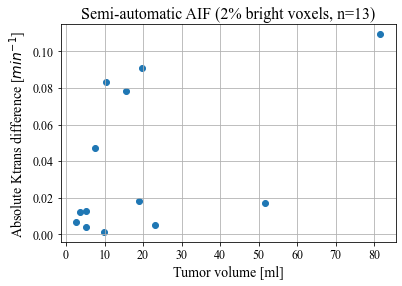

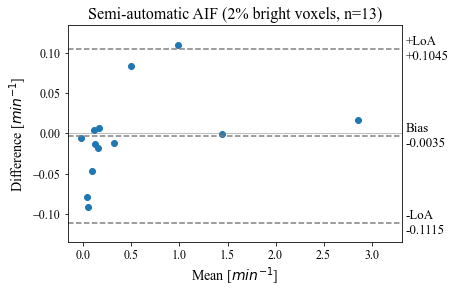

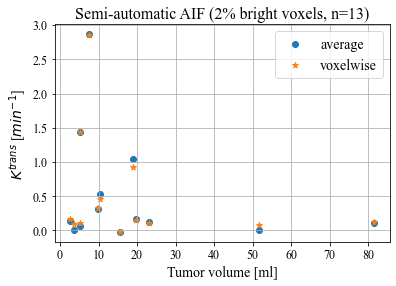

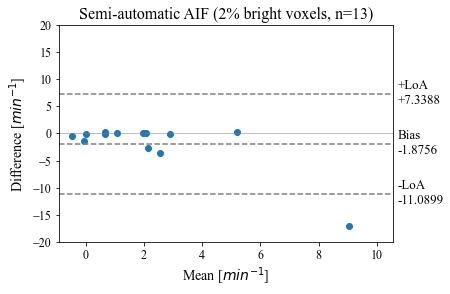

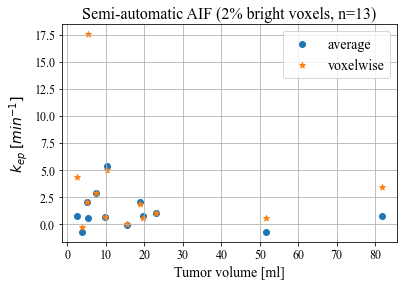

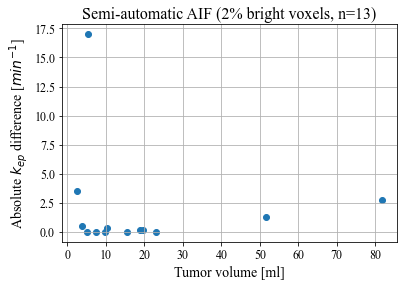

In [127]:
#Automatic AIF: 2 percent brightest voxels 
'''
Plotting the difference in Ktrans values from average and voxelwise modelling versus the tumor volume
'''
f_avr = open('H:/data/Results/AutoAIF/2percent/output_average.json')
f_vox = open('H:/data/Results/AutoAIF/2percent/output_voxelwise.json')

avr_data = json.load(f_avr)
vox_data = json.load(f_vox)

Kt_diff = []
Kt_avrg = []
Kt_voxel = []
kep_avrg = []
kep_voxel = []
ve_avrg = []
ve_voxel = []
vp_avrg = []
vp_voxel = []
tumor_vol = []


for i in range(0,len(vox_data)): 
    tumor_vol.append(avr_data[i]['tumor_volume'])
    Kt_avrg.append(avr_data[i]['Ktrans']*60)
    Kt_voxel.append(vox_data[i]['Ktrans']*60)
    diff = abs(vox_data[i]['Ktrans']*60 - avr_data[i]['Ktrans']*60)
    Kt_diff.append(diff)
    kep_avrg.append(avr_data[i]['kep']*60)
    kep_voxel.append(vox_data[i]['kep']*60)
    ve_avrg.append(avr_data[i]['ve'])
    ve_voxel.append(vox_data[i]['ve'])
    vp_avrg.append(avr_data[i]['vp'])
    vp_voxel.append(vox_data[i]['vp'])

print('Median Kt:', np.median(Kt_avrg), min(Kt_avrg), max(Kt_avrg))
print('Median kep:', np.median(kep_avrg), min(kep_avrg), max(kep_avrg))
print('Median ve:', np.median(ve_avrg), min(ve_avrg), max(ve_avrg))
print('Median vp:', np.median(vp_avrg), min(vp_avrg), max(vp_avrg))

vol_arr = np.array(tumor_vol)
sort_vol = np.sort(vol_arr)
sort_index = np.argsort(vol_arr)

res = [val for (_, val) in sorted(zip(sort_index, Kt_diff), key=lambda x: x[0])]

fig1 = plt.figure(1)
plt.rcParams.update({'font.family':'Times New Roman'})
plt.scatter(sort_vol, res)
plt.xlabel('Tumor volume [ml]', size=label_fontsize)
plt.ylabel('Absolute Ktrans difference [$min^{-1}$]', size=label_fontsize)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.title('Semi-automatic AIF (2% bright voxels, n=13)', size=title_fontsize)
plt.grid()
fig1.savefig('H:/data/Results/AutoAIF/2percent/tumorvol_vs_Ktdiff_autoAIF_2p.eps', bbox_inches='tight')

print('Average')
print('Kt:', np.array(Kt_avrg).mean(), 'std:', np.array(Kt_avrg).std())
print('kep:', np.array(kep_avrg).mean(), 'std:', np.array(kep_avrg).std())
print('ve:', np.array(ve_avrg).mean(), 'std:', np.array(ve_avrg).std())
print('vp:', np.array(vp_avrg).mean(), 'std:', np.array(vp_avrg).std()) 
print('Voxelwise')      
print('Kt:', np.array(Kt_voxel).mean(), 'std:', np.array(Kt_voxel).std())
print('kep:', np.array(kep_voxel).mean(), 'std:', np.array(kep_voxel).std())
print('ve', np.array(ve_voxel).mean(), 'std:', np.array(ve_voxel).std())
print('vp', np.array(vp_voxel).mean(), 'std:', np.array(vp_voxel).std())
print('Difference')
print('Kt:', abs(np.array(Kt_avrg).mean() - np.array(Kt_voxel).mean()), 'Percent:', ((abs(np.array(Kt_avrg).mean() - np.array(Kt_voxel).mean()))/((np.array(Kt_avrg).mean() + np.array(Kt_voxel).mean())/2) * 100))
print('kep:', abs(np.array(kep_avrg).mean() - np.array(kep_voxel).mean()), 'Percent:', ((abs(np.array(kep_avrg).mean() - np.array(kep_voxel).mean()))/((np.array(kep_avrg).mean() + np.array(kep_voxel).mean())/2) * 100))
print('ve:', abs(np.array(ve_avrg).mean() - np.array(ve_voxel).mean()), 'Percent:', ((abs(np.array(ve_avrg).mean() - np.array(ve_voxel).mean()))/((np.array(ve_avrg).mean() + np.array(ve_voxel).mean())/2) * 100))
print('vp:',  abs(np.array(vp_avrg).mean() - np.array(vp_voxel).mean()), 'Percent:', ((abs(np.array(vp_avrg).mean() - np.array(vp_voxel).mean()))/((np.array(vp_avrg).mean() + np.array(vp_voxel).mean())/2) * 100))

#Bland-Altman plot
fig2 = plt.figure(2)
bland_altman_plot(Kt_avrg, Kt_voxel, 3.35)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.title('Semi-automatic AIF (2% bright voxels, n=13)', size=title_fontsize)
fig2.savefig('H:/data/Results/AutoAIF/2percent/Bland_altman_autoAIF_2p.eps', bbox_inches='tight')

#Ktrans against tumor volume
fig3 = plt.figure(3)
plt.rcParams.update({'font.family':'Times New Roman'})
plt.scatter(tumor_vol, Kt_avrg, label='average', color='tab:blue')
plt.scatter(tumor_vol, Kt_voxel, label='voxelwise', color='tab:orange', marker='*')
plt.legend(fontsize=label_fontsize)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlabel('Tumor volume [ml]', size=label_fontsize)
plt.ylabel('$K^{trans}$ [$min^{-1}$]', size=label_fontsize)
plt.title('Semi-automatic AIF (2% bright voxels, n=13)', size=title_fontsize)
#plt.ylim(0,0.05)
plt.grid()
fig3.savefig('H:/data/Results/AutoAIF/2percent/ktrans_vs_tumorvol_autoAIF_2p.eps', bbox_inches='tight')

#Pearson correlation 
pearson = stats.pearsonr(np.asarray(Kt_avrg), np.asarray(Kt_voxel))
print(pearson)
print(pearson.confidence_interval())

#Kolmogorov-Smirnov to test if the data is normally distributed 
ks_result = kstest(Kt_avrg, cdf = 'norm')
if ks_result[1] > 0.05: #t-test if the data is normally distributed 
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    t_test = stats.ttest_rel(np.asarray(Kt_avrg), np.asarray(Kt_voxel))
    print(t_test)
else: #Wilcoxon signed-rank test if the data is not normally distributed 
    print('Data is not normally distributed')
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    res  = wilcoxon(np.array(Kt_avrg), np.array(Kt_voxel))
    print('Wilcoxon p-value:', res.pvalue)


fig4 = plt.figure(4)
bland_altman_plot(kep_avrg, kep_voxel, 10.7)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.title('Semi-automatic AIF (2% bright voxels, n=13)', size=title_fontsize)
fig4.savefig('H:/data/Results/AutoAIF/2percent/Bland_altman_autoAIF_2p_kep.eps', bbox_inches='tight')

fig5 = plt.figure(5)
plt.rcParams.update({'font.family':'Times New Roman'})
plt.scatter(tumor_vol, kep_avrg, label='average', color='tab:blue')
plt.scatter(tumor_vol, kep_voxel, label='voxelwise', color='tab:orange', marker='*')
plt.legend(fontsize=label_fontsize)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlabel('Tumor volume [ml]', size=label_fontsize)
plt.ylabel('$k_{ep}$ $[min^{-1}]$', size=label_fontsize)
plt.title('Semi-automatic AIF (2% bright voxels, n=13)', size=title_fontsize)
#plt.ylim(0,0.05)
plt.grid()
fig5.savefig('H:/data/Results/AutoAIF/2percent/kep_vs_tumorvol_autoAIF_2p.eps', bbox_inches='tight')

kep_diff = abs(np.asarray(kep_avrg) - np.asarray(kep_voxel))
fig6 = plt.figure(6)
plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(vol_arr, kep_diff)
plt.xlabel('Tumor volume [ml]', size=label_fontsize)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.ylabel('Absolute $k_{ep}$ difference [$min^{-1}$]', size=label_fontsize)
plt.title('Semi-automatic AIF (2% bright voxels, n=13)', size=title_fontsize)
plt.grid()
fig6.savefig('H:/data/Results/AutoAIF/tumorvol_vs_kepdiff_autoAIF_2p.eps', bbox_inches='tight')

In [128]:
#Kolmogorov-Smirnov to test if the data is normally distributed 
ks_result = kstest(Kt_avrg, cdf = 'norm')
if ks_result[1] > 0.05: #t-test if the data is normally distributed 
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    t_test = stats.ttest_rel(Kt_avrg, Kt_voxel)
    print(t_test)
else: 
    print('Data is not normally distributed')
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    #mann_whitney = mannwhitneyu(np.array(Kt_avrg), np.array(Kt_voxel))
    #print(mann_whitney)
    res  = wilcoxon(Kt_avrg, Kt_voxel)
    print('Wilcoxon p-value:', res.pvalue)
    print('Wilcoxon z-statistic:', res.statistic)

Data is not normally distributed
K-S statistic: 0.4911685001266998
p-value: 0.002042613955533845
Wilcoxon p-value: 0.587890625
Wilcoxon z-statistic: 37.0


In [23]:
#Pearson correlation 
pearson = stats.pearsonr(np.asarray(Kt_avrg), np.asarray(Kt_voxel))
print(pearson)
print()
#Spearman correlation 
spearman = stats.spearmanr(np.asarray(Kt_avrg), np.asarray(Kt_voxel))
print(spearman)

PearsonRResult(statistic=0.9980585866762839, pvalue=1.288531499210287e-14)

SpearmanrResult(correlation=0.9725274725274725, pvalue=2.6191330438273957e-08)


In [36]:
print(np.median(Kt_avrg))
print(np.median(Kt_voxel))

0.1417127094589002
0.159097787578042


Median Kt: 0.10938354349124271 -0.03545237454697829 1.5915628465275737
Median kep: 0.60988749563058 -0.6546600941600806 2.243808675251222
Median ve: 0.47143687429864256 0.0003618389701396212 0.9999999999999999
Median vp: 0.37344782321027614 1.0601154047435955e-09 0.6309963887890916
Average
Kt: 0.29164898295693137 std: 0.439698222832374
Kt median: 0.10938354349124271
kep: 0.5754298498421178 std: 0.6602053479414928
ve: 0.5096595815922478 std: 0.3946116869291285
vp: 0.3557488589924358 std: 0.17464984847511414
Voxelwise
Kt: 0.2928256321297478 std: 0.4193135019165094
kep: 9.299149257004995 std: 22.899695951834723
ve 0.537744575781932 std: 0.2560101540357826
vp 0.37214547436722084 std: 0.14018692213624262
Difference
Kt: 0.0011766491728164574 Percent: 0.40263482534376865
kep: 8.723719407162877 Percent: 176.6904556187874
ve: 0.028084994189684243 Percent: 5.362780735965901
vp: 0.01639661537478504 Percent: 4.505218580038974
Bias percent: -7.527665404391259


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Bias percent: -161.96491408952596


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PearsonRResult(statistic=0.9898684244183602, pvalue=5.408000856170891e-15)
ConfidenceInterval(low=0.9723688255708257, high=0.9963057940076744)
Data is not normally distributed
K-S statistic: 0.5119737102975116
p-value: 4.046078389717062e-15


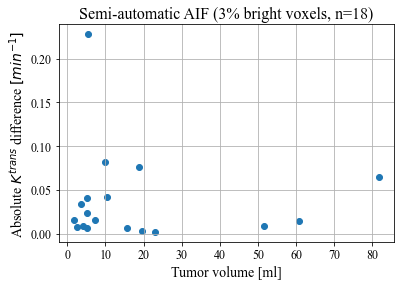

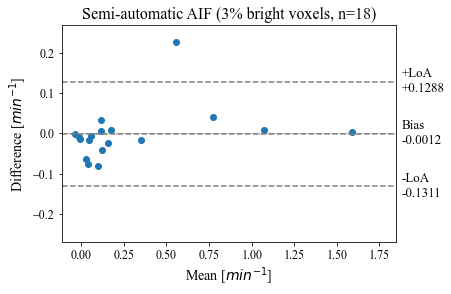

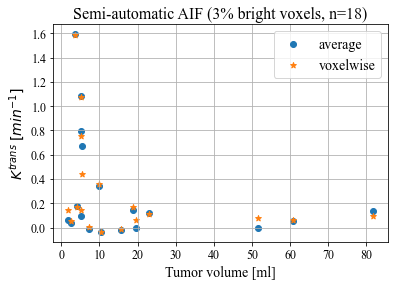

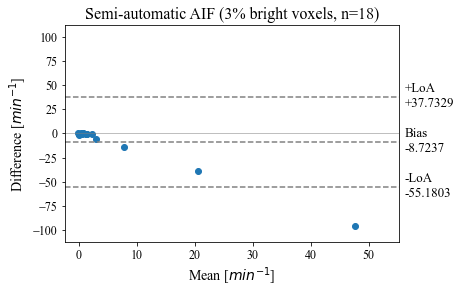

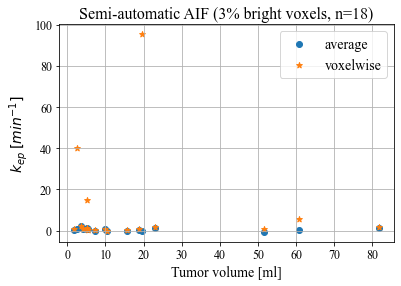

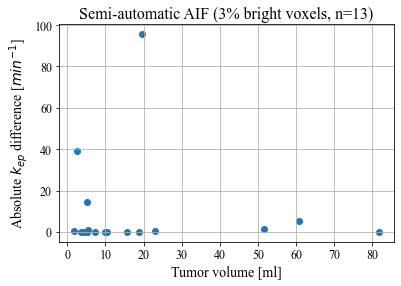

In [129]:
#Automatic AIF: 3 percent brightest voxels 
f_avr = open('H:/data/Results/AutoAIF/3percent/output_average.json')
f_vox = open('H:/data/Results/AutoAIF/3percent/output_voxelwise.json')

avr_data = json.load(f_avr)
vox_data = json.load(f_vox)

Kt_diff = []
Kt_avrg = []
Kt_voxel = []
kep_avrg = []
kep_voxel = []
ve_avrg = []
ve_voxel = []
vp_avrg = []
vp_voxel = []
tumor_vol = []


for i in range(0,len(vox_data)): 
    tumor_vol.append(avr_data[i]['tumor_volume'])
    Kt_avrg.append(avr_data[i]['Ktrans']*60)
    Kt_voxel.append(vox_data[i]['Ktrans']*60)
    diff = abs(avr_data[i]['Ktrans']*60 - vox_data[i]['Ktrans']*60)
    Kt_diff.append(diff)
    kep_avrg.append(avr_data[i]['kep']*60)
    kep_voxel.append(vox_data[i]['kep']*60)
    ve_avrg.append(avr_data[i]['ve'])
    ve_voxel.append(vox_data[i]['ve'])
    vp_avrg.append(avr_data[i]['vp'])
    vp_voxel.append(vox_data[i]['vp'])

    
print('Median Kt:', np.median(Kt_avrg), min(Kt_avrg), max(Kt_avrg))
print('Median kep:', np.median(kep_avrg), min(kep_avrg), max(kep_avrg))
print('Median ve:', np.median(ve_avrg), min(ve_avrg), max(ve_avrg))
print('Median vp:', np.median(vp_avrg), min(vp_avrg), max(vp_avrg))
    
vol_arr = np.array(tumor_vol)
sort_vol = np.sort(vol_arr)
sort_index = np.argsort(vol_arr)

res = [val for (_, val) in sorted(zip(sort_index, Kt_diff), key=lambda x: x[0])]

fig1 = plt.figure(1)
plt.rcParams.update({'font.family':'Times New Roman'})
plt.scatter(sort_vol, res)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlabel('Tumor volume [ml]', size=label_fontsize)
plt.ylabel('Absolute $K^{trans}$ difference $[min^{-1}]$', size=label_fontsize)
plt.title('Semi-automatic AIF (3% bright voxels, n=18)', size=title_fontsize)
plt.grid()
fig1.savefig('H:/data/Results/AutoAIF/3percent/tumorvol_vs_Ktdiff_autoAIF_3p.eps', bbox_inches='tight')

print('Average')
print('Kt:', np.array(Kt_avrg).mean(), 'std:', np.array(Kt_avrg).std())
print('Kt median:', np.median(Kt_avrg))
print('kep:', np.array(kep_avrg).mean(), 'std:', np.array(kep_avrg).std())
print('ve:', np.array(ve_avrg).mean(), 'std:', np.array(ve_avrg).std())
print('vp:', np.array(vp_avrg).mean(), 'std:', np.array(vp_avrg).std()) 
print('Voxelwise')      
print('Kt:', np.array(Kt_voxel).mean(), 'std:', np.array(Kt_voxel).std())
print('kep:', np.array(kep_voxel).mean(), 'std:', np.array(kep_voxel).std())
print('ve', np.array(ve_voxel).mean(), 'std:', np.array(ve_voxel).std())
print('vp', np.array(vp_voxel).mean(), 'std:', np.array(vp_voxel).std())
print('Difference')
print('Kt:', abs(np.array(Kt_avrg).mean() - np.array(Kt_voxel).mean()), 'Percent:', ((abs(np.array(Kt_avrg).mean() - np.array(Kt_voxel).mean()))/((np.array(Kt_avrg).mean() + np.array(Kt_voxel).mean())/2) * 100))
print('kep:', abs(np.array(kep_avrg).mean() - np.array(kep_voxel).mean()), 'Percent:', ((abs(np.array(kep_avrg).mean() - np.array(kep_voxel).mean()))/((np.array(kep_avrg).mean() + np.array(kep_voxel).mean())/2) * 100))
print('ve:', abs(np.array(ve_avrg).mean() - np.array(ve_voxel).mean()), 'Percent:', ((abs(np.array(ve_avrg).mean() - np.array(ve_voxel).mean()))/((np.array(ve_avrg).mean() + np.array(ve_voxel).mean())/2) * 100))
print('vp:',  abs(np.array(vp_avrg).mean() - np.array(vp_voxel).mean()), 'Percent:', ((abs(np.array(vp_avrg).mean() - np.array(vp_voxel).mean()))/((np.array(vp_avrg).mean() + np.array(vp_voxel).mean())/2) * 100))


#Bland-Altman plot
fig2 = plt.figure(2)
bland_altman_plot(Kt_avrg, Kt_voxel, 1.88)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.title('Semi-automatic AIF (3% bright voxels, n=18)', size=title_fontsize)
fig2.savefig('H:/data/Results/AutoAIF/3percent/Bland_altman_autoAIF_3p.eps', bbox_inches='tight')

#Ktrans against tumor volume
fig3 = plt.figure(3)
plt.rcParams.update({'font.family':'Times New Roman'})
plt.scatter(tumor_vol, Kt_avrg, label='average', color='tab:blue')
plt.scatter(tumor_vol, Kt_voxel, label='voxelwise', color='tab:orange', marker='*')
plt.legend(fontsize=label_fontsize)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlabel('Tumor volume [ml]', size=label_fontsize)
plt.ylabel('$K^{trans}$ $[min^{-1}]$', size=label_fontsize)
plt.title('Semi-automatic AIF (3% bright voxels, n=18)', size=title_fontsize)
plt.grid()
fig3.savefig('H:/data/Results/AutoAIF/3percent/ktrans_vs_tumorvol_autoAIF_3p.eps', bbox_inches='tight')

fig4 = plt.figure(4)
bland_altman_plot(kep_avrg, kep_voxel,56.2)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.title('Semi-automatic AIF (3% bright voxels, n=18)', size=title_fontsize)
fig4.savefig('H:/data/Results/AutoAIF/3percent/Bland_altman_autoAIF_3p_kep.eps', bbox_inches='tight')

fig5 = plt.figure(5)
plt.rcParams.update({'font.family':'Times New Roman'})
plt.scatter(tumor_vol, kep_avrg, label='average', color='tab:blue')
plt.scatter(tumor_vol, kep_voxel, label='voxelwise', color='tab:orange', marker='*')
plt.legend(fontsize=label_fontsize)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlabel('Tumor volume [ml]', size=label_fontsize)
plt.ylabel('$k_{ep}$ $[min^{-1}]$', size=label_fontsize)
plt.title('Semi-automatic AIF (3% bright voxels, n=18)', size=title_fontsize)
#plt.ylim(0,0.05)
plt.grid()
fig5.savefig('H:/data/Results/AutoAIF/3percent/kep_vs_tumorvol_autoAIF_3p.eps', bbox_inches='tight')

#Pearson correlation 
pearson = stats.pearsonr(np.asarray(Kt_avrg), np.asarray(Kt_voxel))
print(pearson)
print(pearson.confidence_interval())

#t-test between average and voxelwise
#t-test between average and voxelwise
ks_result = kstest(result_Kt, cdf='norm')
if ks_result[1] > 0.05:
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    t_test = stats.ttest_rel(np.asarray(Kt_avrg), np.asarray(Kt_voxel))
    print(t_test)
else: 
    print('Data is not normally distributed')
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    
kep_diff = abs(np.asarray(kep_avrg) - np.asarray(kep_voxel))
fig6 = plt.figure(6)
plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(vol_arr, kep_diff)
plt.xlabel('Tumor volume [ml]', size=label_fontsize)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.ylabel('Absolute $k_{ep}$ difference [$min^{-1}$]', size=label_fontsize)
plt.title('Semi-automatic AIF (3% bright voxels, n=13)', size=title_fontsize)
plt.grid()
fig6.savefig('H:/data/Results/AutoAIF/tumorvol_vs_kepdiff_autoAIF_3p.eps', bbox_inches='tight')

In [130]:
#Kolmogorov-Smirnov to test if the data is normally distributed 
ks_result = kstest(Kt_avrg, cdf = 'norm')
if ks_result[1] > 0.05: #t-test if the data is normally distributed 
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    t_test = stats.ttest_rel(Kt_avrg, Kt_voxel)
    print(t_test)
else: 
    print('Data is not normally distributed')
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    #mann_whitney = mannwhitneyu(np.array(Kt_avrg), np.array(Kt_voxel))
    #print(mann_whitney)
    res  = wilcoxon(Kt_avrg, Kt_voxel)
    print('Wilcoxon p-value:', res.pvalue)
    print('Wilcoxon z-statistic:', res.statistic)

Data is not normally distributed
K-S statistic: 0.48585951104270103
p-value: 0.00019481672496372574
Wilcoxon p-value: 0.30379486083984375
Wilcoxon z-statistic: 61.0


In [25]:
#Pearson correlation 
pearson = stats.pearsonr(np.asarray(Kt_avrg), np.asarray(Kt_voxel))
print(pearson)
print()
#Spearman correlation 
spearman = stats.spearmanr(np.asarray(Kt_avrg), np.asarray(Kt_voxel))
print(spearman)

PearsonRResult(statistic=0.9898684244183602, pvalue=5.408000856170891e-15)

SpearmanrResult(correlation=0.9690402476780186, pvalue=3.851406014182882e-11)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Kt mean: 0.052760695043814976 Percent: 37.40787976632811
Kep mean: 0.23190595848757703 Percent: 38.762107211264265
ve mean: 0.060690421001985705 Percent: 24.11746086693405
vp mean: 0.044342093139552875 Percent: 22.96314081730577
Bias percent: -21.865414338956796
PearsonRResult(statistic=0.7777420559337087, pvalue=5.428820024887168e-05)
SpearmanrResult(correlation=0.6451127819548872, pvalue=0.00213069297044068)
Data is not normally distributed
K-S statistic: 0.5168011513500332
p-value: 1.724389198237907e-05
Wilcoxon p-value: 0.00830841064453125
Wilcoxon z-statistic: 36.0
0.1317222825491492
0.10207741898103206


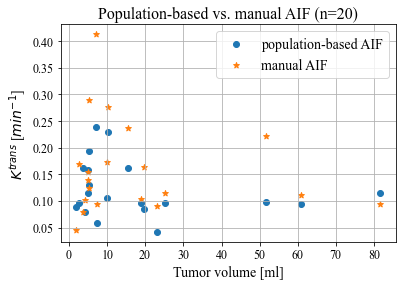

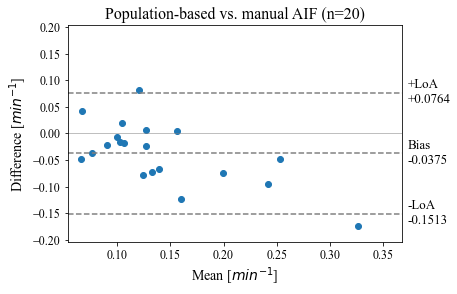

In [108]:
#population-based vs. manual AIF
f_pop = open('H:/data/Results/PopAIF/output_average.json')
f_man = open('H:/data/Results/ManualAIF/output_average.json')
f_tv = open('H:/data/Results/PopAIF/output_voxelwise.json')

pop_data = json.load(f_pop)
man_data = json.load(f_man)
tv_data = json.load(f_tv)

Kt_diff = []
Kt_pop = []
Kt_man = []
kep_pop = []
kep_man = []
ve_pop = []
ve_man = []
vp_pop = []
vp_man = []
tumor_vol = []

for i in range(0,len(pop_data)): 
    tumor_vol.append(tv_data[i]['tumor_volume'])
    Kt_pop.append(pop_data[i]['Ktrans']*60)
    Kt_man.append(man_data[i]['Ktrans']*60)
    kep_pop.append(pop_data[i]['kep']*60)
    kep_man.append(man_data[i]['kep']*60)
    ve_pop.append(pop_data[i]['ve'])
    ve_man.append(man_data[i]['ve'])
    vp_pop.append(pop_data[i]['vp'])
    vp_man.append(man_data[i]['vp'])

vol_arr = np.array(tumor_vol)
sort_vol = np.sort(vol_arr)
sort_index = np.argsort(vol_arr)

res = [val for (_, val) in sorted(zip(sort_index, Kt_diff), key=lambda x: x[0])]

fig1 = plt.figure(1)
plt.rcParams.update({'font.family':'Times New Roman'})
plt.scatter(tumor_vol, Kt_pop, label='population-based AIF', color='tab:blue')
plt.scatter(tumor_vol, Kt_man, label='manual AIF', color='tab:orange', marker='*')
plt.legend(fontsize=label_fontsize)
plt.xticks(size=tick_size)
plt.yticks(size=tick_size)
plt.xlabel('Tumor volume [ml]', size=label_fontsize)
plt.ylabel('$K^{trans}$ [$min^{-1}$]', size=label_fontsize)
plt.title('Population-based vs. manual AIF (n=20)', size=title_fontsize)
plt.grid()
fig1.savefig('H:/data/Results/Ktman_vs_Kt_pop.eps', bbox_inches='tight')

Kt_percent = []
kep_percent = []
ve_percent = []
vp_percent = []
for i in range(len(Kt_pop)): 
    Kt_percent.append(((abs(Kt_pop[i] - Kt_man[i]))/((Kt_pop[i] + Kt_man[i])/2) * 100))
    kep_percent.append(((abs(kep_pop[i] - kep_man[i]))/((kep_pop[i] + kep_man[i])/2) * 100))
    ve_percent.append(((abs(ve_pop[i] - ve_man[i]))/((ve_pop[i] + ve_man[i])/2) * 100))
    vp_percent.append(((abs(vp_pop[i] - vp_man[i]))/((vp_pop[i] + vp_man[i])/2) * 100))

Kt_diff = abs(np.asarray(Kt_pop) - np.asarray(Kt_man))
print('Kt mean:', Kt_diff.mean(), 'Percent:', np.mean(Kt_percent))

kep_diff = abs(np.asarray(kep_pop) - np.asarray(kep_man))
print('Kep mean:', kep_diff.mean(), 'Percent:', np.mean(kep_percent))

ve_diff = abs(np.asarray(ve_pop) - np.asarray(ve_man))
print('ve mean:', ve_diff.mean(), 'Percent:', np.mean(ve_percent))

vp_diff = abs(np.asarray(vp_pop) - np.asarray(vp_man))
print('vp mean:', vp_diff.mean(), 'Percent:', np.mean(vp_percent))

#Bland-Altman 
fig2 = plt.figure(2)
plt.rcParams.update({'font.family':'Times New Roman'})
bland_altman_plot(Kt_pop, Kt_man, 0.373)
plt.xticks(size=tick_size)
plt.yticks(size=tick_size)
plt.title('Population-based vs. manual AIF (n=20)', size=title_fontsize)
fig2.savefig('H:/data/Results/Bland_altman_popvsmanAIF.eps', bbox_inches='tight')

#Pearson correlation 
pearson = stats.pearsonr(np.asarray(Kt_pop), np.asarray(Kt_man))
print(pearson)
spearman = spearmanr(np.asarray(Kt_pop), np.asarray(Kt_man))
print(spearman)


#Kolmogorov-Smirnov to test if the data is normally distributed 
ks_result = kstest(Kt_pop, cdf = 'norm')
if ks_result[1] > 0.05: #t-test if the data is normally distributed 
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    t_test = stats.ttest_rel(np.asarray(Kt_pop), np.asarray(Kt_man))
    print(t_test)
else: 
    print('Data is not normally distributed')
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    #mann_whitney = mannwhitneyu(np.array(Kt_avrg), np.array(Kt_voxel))
    #print(mann_whitney)
    res  = wilcoxon(np.asarray(Kt_pop), np.asarray(Kt_man))
    print('Wilcoxon p-value:', res.pvalue)
    print('Wilcoxon z-statistic:', res.statistic)

print(np.median(Kt_man))
print(np.median(Kt_pop))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Kt mean: 0.28454432720272194 Percent: 120.10745372448835 Max: 1.5116646537364693 Max percent: 258.72343735580813 Min: 0.013736669308119391 Min percent: 22.99138900780703
Kep mean: 0.7025537240916397 Percent: 110.08428233929197 Max: 2.5590845273872285 Max percent: 409.5307326975823 Min: 0.013736669308119336 Min percent: 7.60953628313598
ve mean: 0.3066848098708074 Percent: 82.84541441608975 Max: 0.8803446553033888 Max percent: 198.7597836941689 Min: 1.4432899320127035e-15 Min percent: 1.443289932012706e-13
vp mean: 0.2190559630442839 Percent: 86.15189021125428 Max: 0.39076931350166794 Max percent: 199.9999982535855 Min: 0.05590004444748843 Min percent: 40.687154506373055
Bias percent: -32.173980345127106
PearsonRResult(statistic=-0.10362662500685355, pvalue=0.682398619439848)
SpearmanrResult(correlation=-0.2528379772961816, pvalue=0.31141340050989863)
Data is not normally distributed
K-S statistic: 0.5185693464996767
p-value: 5.010975562785189e-05
Wilcoxon p-value: 0.6396942138671875
Wi

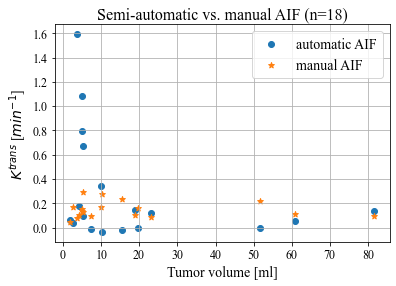

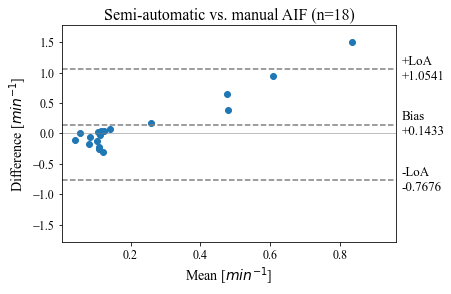

In [109]:
#Manual AIF vs. automatic AIF
f_auto = open('H:/data/Results/AutoAIF/3percent/output_average.json')
f_man = open('H:/data/Results/ManualAIF/output_average.json')
#f_tv = open('H:/data/Results/PopAIF/output_voxelwise.json')

auto_data = json.load(f_auto)
man_data = json.load(f_man)
#tv_data = json.load(f_tv)

Kt_auto = []
Kt_man = []
kep_auto = []
kep_man = []
ve_auto = []
ve_man = []
vp_auto = []
vp_man = []
tumor_vol = []

for i in range(len(man_data)): 
    for j in range(len(auto_data)): 
        if auto_data[j]['patientID'] == man_data[i]['patientID']: 
            tumor_vol.append(auto_data[j]['tumor_volume'])
            Kt_auto.append(auto_data[j]['Ktrans']*60)
            Kt_man.append(man_data[i]['Ktrans']*60)
            kep_auto.append(auto_data[j]['kep']*60)
            kep_man.append(man_data[i]['kep']*60)
            ve_auto.append(auto_data[j]['ve'])
            ve_man.append(man_data[i]['ve'])
            vp_auto.append(auto_data[j]['vp'])
            vp_man.append(man_data[i]['vp'])
            
vol_arr = np.array(tumor_vol)
sort_vol = np.sort(vol_arr)
sort_index = np.argsort(vol_arr)
Kt_diff = abs(np.asarray(Kt_auto) - np.asarray(Kt_man))
res = [val for (_, val) in sorted(zip(sort_index, Kt_diff), key=lambda x: x[0])]

fig1 = plt.figure(1)
plt.rcParams.update({'font.family':'Times New Roman'})
plt.scatter(tumor_vol, Kt_auto, label='automatic AIF', color='tab:blue')
plt.scatter(tumor_vol, Kt_man, label='manual AIF', color='tab:orange', marker='*')
plt.legend(fontsize=label_fontsize)
plt.xticks(size=tick_size)
plt.yticks(size=tick_size)
plt.xlabel('Tumor volume [ml]', size=label_fontsize)
plt.ylabel('$K^{trans}$ [$min^{-1}$]', size=label_fontsize)
plt.title('Semi-automatic vs. manual AIF (n=18)', size=title_fontsize)
plt.grid()
fig1.savefig('H:/data/Results/Ktman_vs_Kt_auto.eps', bbox_inches='tight')

Kt_percent = []
kep_percent = []
ve_percent = []
vp_percent = []
for i in range(len(Kt_man)): 
    Kt_percent.append(((abs(Kt_auto[i] - Kt_man[i]))/((Kt_auto[i] + Kt_man[i])/2) * 100))
    kep_percent.append(((abs(kep_auto[i] - kep_man[i]))/((kep_auto[i] + kep_man[i])/2) * 100))
    ve_percent.append(((abs(ve_auto[i] - ve_man[i]))/((ve_auto[i] + ve_man[i])/2) * 100))
    vp_percent.append(((abs(vp_auto[i] - vp_man[i]))/((vp_auto[i] + vp_man[i])/2) * 100))


print('Kt mean:', Kt_diff.mean(), 'Percent:', np.mean(Kt_percent), 'Max:', Kt_diff.max(), 'Max percent:', np.max(Kt_percent), 'Min:', Kt_diff.min(), 'Min percent:', np.min(Kt_percent))

kep_diff = abs(np.asarray(kep_auto) - np.asarray(kep_man))
print('Kep mean:', kep_diff.mean(), 'Percent:', np.mean(kep_percent), 'Max:', kep_diff.max(), 'Max percent:', np.max(kep_percent),  'Min:', kep_diff.min(),  'Min percent:', np.min(kep_percent))

ve_diff = abs(np.asarray(ve_auto) - np.asarray(ve_man))
print('ve mean:', ve_diff.mean(), 'Percent:', np.mean(ve_percent), 'Max:', ve_diff.max(), 'Max percent:', np.max(ve_percent), 'Min:', ve_diff.min(), 'Min percent:', np.min(ve_percent))

vp_diff = abs(np.asarray(vp_auto) - np.asarray(vp_man))
print('vp mean:', vp_diff.mean(), 'Percent:', np.mean(vp_percent), 'Max:', vp_diff.max(), 'Max percent:', np.max(vp_percent), 'Min:', vp_diff.min(), 'Min percent:', np.min(vp_percent))

#Bland-Altman 
fig2 = plt.figure(2)
bland_altman_plot(Kt_auto, Kt_man, 0.978)
plt.xticks(size=tick_size)
plt.yticks(size=tick_size)
plt.title('Semi-automatic vs. manual AIF (n=18)', size=title_fontsize)
fig2.savefig('H:/data/Results/Bland_altman_manvsautoAIF.eps', bbox_inches='tight')

#Pearson correlation 
pearson = stats.pearsonr(np.asarray(Kt_man), np.asarray(Kt_auto))
print(pearson)
spearman = spearmanr(np.asarray(Kt_man), np.asarray(Kt_auto))
print(spearman)
#Kolmogorov-Smirnov to test if the data is normally distributed 
ks_result = kstest(Kt_man, cdf = 'norm')
if ks_result[1] > 0.05: #t-test if the data is normally distributed 
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    t_test = stats.ttest_rel(np.asarray(Kt_man), np.asarray(Kt_auto))
    print(t_test)
else: 
    print('Data is not normally distributed')
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    #mann_whitney = mannwhitneyu(np.array(Kt_avrg), np.array(Kt_voxel))
    #print(mann_whitney)
    res  = wilcoxon(np.asarray(Kt_man), np.asarray(Kt_auto))
    print('Wilcoxon p-value:', res.pvalue)
    print('Wilcoxon z-statistic:', res.statistic)
    
    
    
print(np.median(Kt_man))
print(np.median(Kt_auto))       

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Kt mean: 0.26962709604926627 Percent: 130.3106550572807 Max: 1.4296499968378336 Max percent: 298.72264849923107 Min: 0.018344522831766977 Min percent: 14.77933986358074
Kep mean: 0.72499573708828 Percent: 128.04654164635133 Max: 2.621626317617255 Max percent: 444.95212690594724 Min: 0.027829479752773292 Min percent: 13.165687777263932
ve mean: 0.33226409732638085 Percent: 89.9087117895183 Max: 0.8923521664388812 Max percent: 197.12887394361215 Min: 8.996137168537643e-13 Min percent: 8.9961371685417e-11
vp mean: 0.21445992903020683 Percent: 83.45655731644523 Max: 0.3922776839107523 Max percent: 199.99999845970254 Min: 0.014196042231940376 Min percent: 7.087044118600949
Bias percent: -30.056124741001593
PearsonRResult(statistic=0.33796438645931437, pvalue=0.17016042702393963)
SpearmanrResult(correlation=0.17853457172342618, pvalue=0.4784449329228029)
Data is not normally distributed
K-S statistic: 0.5168011513500332
p-value: 5.408572271397307e-05
Wilcoxon p-value: 0.44229888916015625
Wil

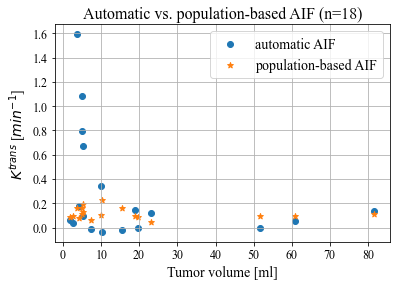

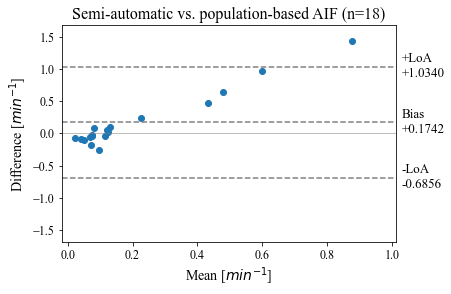

In [111]:
#population-based AIF vs. automatic AIF
f_auto = open('H:/data/Results/AutoAIF/3percent/output_average.json')
f_pop = open('H:/data/Results/PopAIF/output_average.json')
#f_tv = open('H:/data/Results/PopAIF/output_voxelwise.json')

auto_data = json.load(f_auto)
pop_data = json.load(f_pop)

Kt_auto = []
Kt_pop = []
kep_auto = []
kep_pop = []
ve_auto = []
ve_pop = []
vp_auto = []
vp_pop = []
tumor_vol = []

for i in range(len(pop_data)): 
    for j in range(len(auto_data)): 
        if auto_data[j]['patientID'] == pop_data[i]['patientID']: 
            tumor_vol.append(auto_data[j]['tumor_volume'])
            Kt_auto.append(auto_data[j]['Ktrans']*60)
            Kt_pop.append(pop_data[i]['Ktrans']*60)
            kep_auto.append(auto_data[j]['kep']*60)
            kep_pop.append(pop_data[i]['kep']*60)
            ve_auto.append(auto_data[j]['ve'])
            ve_pop.append(pop_data[i]['ve'])
            vp_auto.append(auto_data[j]['vp'])
            vp_pop.append(pop_data[i]['vp'])

vol_arr = np.array(tumor_vol)
sort_vol = np.sort(vol_arr)
sort_index = np.argsort(vol_arr)
Kt_diff = abs(np.asarray(Kt_auto) - np.asarray(Kt_pop))
res = [val for (_, val) in sorted(zip(sort_index, Kt_diff), key=lambda x: x[0])]

fig1 = plt.figure(1)
plt.rcParams.update({'font.family':'Times New Roman'})
plt.scatter(tumor_vol, Kt_auto, label='automatic AIF', color='tab:blue')
plt.scatter(tumor_vol, Kt_pop, label='population-based AIF', color='tab:orange', marker='*')
plt.legend(fontsize=label_fontsize)
plt.xticks(size=tick_size)
plt.yticks(size=tick_size)
plt.xlabel('Tumor volume [ml]', size=label_fontsize)
plt.ylabel('$K^{trans}$ [$min^{-1}$]', size=label_fontsize)
plt.title('Automatic vs. population-based AIF (n=18)', size=title_fontsize)
plt.grid()
fig1.savefig('H:/data/Results/Ktpop_vs_Kt_auto.eps', bbox_inches='tight')

Kt_percent = []
kep_percent = []
ve_percent = []
vp_percent = []
for i in range(len(Kt_pop)): 
    Kt_percent.append(((abs(Kt_auto[i] - Kt_pop[i]))/((Kt_auto[i] + Kt_pop[i])/2) * 100))
    kep_percent.append(((abs(kep_auto[i] - kep_pop[i]))/((kep_auto[i] + kep_pop[i])/2) * 100))
    ve_percent.append(((abs(ve_auto[i] - ve_pop[i]))/((ve_auto[i] + ve_pop[i])/2) * 100))
    vp_percent.append(((abs(vp_auto[i] - vp_pop[i]))/((vp_auto[i] + vp_pop[i])/2) * 100))


print('Kt mean:', Kt_diff.mean(), 'Percent:', np.mean(Kt_percent), 'Max:', Kt_diff.max(), 'Max percent:', np.max(Kt_percent), 'Min:', Kt_diff.min(), 'Min percent:', np.min(Kt_percent))

kep_diff = abs(np.asarray(kep_auto) - np.asarray(kep_pop))
print('Kep mean:', kep_diff.mean(), 'Percent:', np.mean(kep_percent), 'Max:', kep_diff.max(), 'Max percent:', np.max(kep_percent),  'Min:', kep_diff.min(),  'Min percent:', np.min(kep_percent))

ve_diff = abs(np.asarray(ve_auto) - np.asarray(ve_pop))
print('ve mean:', ve_diff.mean(), 'Percent:', np.mean(ve_percent), 'Max:', ve_diff.max(), 'Max percent:', np.max(ve_percent), 'Min:', ve_diff.min(), 'Min percent:', np.min(ve_percent))

vp_diff = abs(np.asarray(vp_auto) - np.asarray(vp_pop))
print('vp mean:', vp_diff.mean(), 'Percent:', np.mean(vp_percent), 'Max:', vp_diff.max(), 'Max percent:', np.max(vp_percent), 'Min:', vp_diff.min(), 'Min percent:', np.min(vp_percent))

#Bland-Altman 
fig2 = plt.figure(2)
bland_altman_plot(Kt_auto, Kt_pop, 1.03)
plt.xticks(size=tick_size)
plt.yticks(size=tick_size)
plt.title('Semi-automatic vs. population-based AIF (n=18)', size=title_fontsize)
fig2.savefig('H:/data/Results/Bland_altman_popvsautoAIF.eps', bbox_inches='tight')

#Pearson correlation 
pearson = stats.pearsonr(np.asarray(Kt_auto), np.asarray(Kt_pop))
print(pearson)
spearman = spearmanr(np.asarray(Kt_auto), np.asarray(Kt_pop))
print(spearman)


#Kolmogorov-Smirnov to test if the data is normally distributed 
ks_result = kstest(Kt_pop, cdf = 'norm')
if ks_result[1] > 0.05: #t-test if the data is normally distributed 
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    t_test = stats.ttest_rel(np.asarray(Kt_pop), np.asarray(Kt_auto))
    print(t_test)
else: 
    print('Data is not normally distributed')
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    #mann_whitney = mannwhitneyu(np.array(Kt_avrg), np.array(Kt_voxel))
    #print(mann_whitney)
    res  = wilcoxon(np.asarray(Kt_pop), np.asarray(Kt_auto))
    print('Wilcoxon p-value:', res.pvalue)
    print('Wilcoxon z-statistic:', res.statistic)
    
np.savetxt("H:/data/master endometrial data/Kt_autoAIF.csv", np.array(Kt_auto), delimiter=",")
np.savetxt("H:/data/master endometrial data/Kt_populationAIF.csv", np.array(Kt_pop), delimiter=",")
np.savetxt("H:/data/master endometrial data/Kt_manualAIF.csv", np.array(Kt_man), delimiter=",")

In [109]:
#3 percent 
f_cost = open('H:/data/Results/AutoAIF/3percent/AIFcost_average.json')
cost_data = json.load(f_cost)

cost1 = []
cost_dil = []
cost_rg = []
cost_final = []
patients = []
for i in range(0,len(cost_data)): 
    cost1.append(cost_data[i]['cost'])
    patients.append(cost_data[i]['patientID'])
    cost_dil.append(cost_data[i]['cost after dilation'])
    cost_rg.append(cost_data[i]['cost after region growing'])

cost_list = pd.DataFrame(
    {'patient': patients,
     'cost region growing': cost_rg
    })

cost_list



,patient,cost region growing
0,{'5': 'GYN 011'},{'5': 1.4996416728556161}
1,{'4': 'GYN 036'},{'4': 0.06688212981653559}
2,{'5': 'GYN 042'},{'5': 0.08032402854110356}
3,{'10': 'GYN 097'},{'10': 0.027954893589135416}
4,{'10': 'GYN 118'},{'10': 0.07627847364127244}
5,{'9': 'GYN 135'},{'9': 0.023129356135325702}
6,{'1': 'GYN 136'},{'1': 0.08449826257058585}
7,{'9': 'GYN 150'},{'9': 0.11318127186438631}
8,{'2': 'GYN 170'},{'2': 0.06216686156799274}
9,{'3': 'GYN 191'},{'3': 0.056224492830088395}


In [110]:
#2 percent 
f_cost = open('H:/data/Results/AutoAIF/2percent/AIFcost_average.json')
cost_data = json.load(f_cost)

cost1 = []
cost_dil = []
cost_rg = []
cost_final = []
patients = []
for i in range(0,len(cost_data)): 
    cost1.append(cost_data[i]['cost'])
    patients.append(cost_data[i]['patientID'])
    cost_dil.append(cost_data[i]['cost after dilation'])
    cost_rg.append(cost_data[i]['cost after region growing'])

cost_list = pd.DataFrame(
    {'patient': patients,
     'cost region growing': cost_rg
    })

cost_list



,patient,cost region growing
0,{'1': 'GYN 011'},{'1': 2.0066723352610802}
1,{'2': 'GYN 036'},{'2': 0.6190178389254368}
2,{'6': 'GYN 042'},{'6': 0.07237380452470432}
3,{'34': 'GYN 097'},{'34': 0.027886646546568302}
4,{'6': 'GYN 118'},{'6': 0.09656508872526787}
5,{'7': 'GYN 135'},{'7': 0.14966150837083197}
6,{'1': 'GYN 170'},{'1': 0.43976764159531917}
7,{'21': 'GYN 191'},{'21': 0.07934983313706784}
8,{'13': 'GYN 198'},{'13': 0.8010747548684418}
9,{'8': 'GYN 229'},{'8': 0.27141020642105496}


In [112]:
#5 percent 
f_cost = open('H:/data/Results/AutoAIF/5percent/AIFcost_average.json')
cost_data = json.load(f_cost)

cost1 = []
cost_dil = []
cost_rg = []
cost_final = []
patients = []
for i in range(0,len(cost_data)): 
    cost1.append(cost_data[i]['cost'])
    patients.append(cost_data[i]['patientID'])
    cost_dil.append(cost_data[i]['cost after dilation'])
    cost_rg.append(cost_data[i]['cost after region growing'])

cost_list = pd.DataFrame(
    {'patient': patients,
     'cost region growing': cost_rg
    })

cost_list

,patient,cost region growing
0,{'5': 'GYN 011'},{'5': 0.6694570914480378}
1,{'4': 'GYN 036'},{'4': 1.1867917838572604}
2,{'9': 'GYN 042'},{'9': 0.0816600697630775}
3,{'16': 'GYN 097'},{'16': 0.006658588007439796}
4,{'5': 'GYN 118'},{'5': 0.0691975847522486}
5,{'18': 'GYN 122'},{'18': 0.09654790863296636}
6,{'9': 'GYN 135'},{'9': 0.018343462164846537}
7,{'34': 'GYN 136'},{'34': 0.08492925148049049}
8,{'3': 'GYN 150'},{'3': 0.03732998603562783}
9,{'3': 'GYN 170'},{'3': 0.07541378959353903}


In [113]:
#5 percent 
f_cost = open('H:/data/Results/AutoAIF/1percent_1cluster/AIFcost_average.json')
cost_data = json.load(f_cost)

cost1 = []
cost_dil = []
cost_rg = []
cost_final = []
patients = []
for i in range(0,len(cost_data)): 
    cost1.append(cost_data[i]['cost'])
    patients.append(cost_data[i]['patientID'])
    cost_dil.append(cost_data[i]['cost after dilation'])
    cost_rg.append(cost_data[i]['cost after region growing'])

cost_list = pd.DataFrame(
    {'patient': patients,
     'cost region growing': cost_rg
    })

cost_list

,patient,cost region growing
0,{'2': 'GYN 191'},{'2': 0.23986081518943736}
1,{'5': 'GYN 251'},{'5': 2.551350152332284}
2,{'13': 'GYN 255'},{'13': 0.057664712091175845}


In [73]:
model_option = 'voxelwise'
read_option = 'mask2dce'

# Load patient data
patient_path = 'H:/data/master endometrial data/198/'
dce_path = os.path.join(patient_path, 'dce')
mask_path = os.path.join(patient_path, 'mask')

#Read data 
MASK, DCE, timeline = readdata(mask_path, dce_path, read_option)

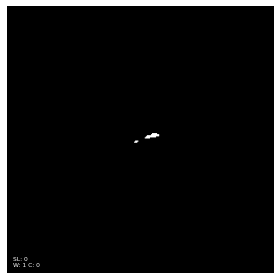

In [72]:
MASK[1,:,:].show()

In [87]:
#Running Tofts model for one patient using the population-based AIF and saving all optimized parameters inside the tumor 

#Functions 
from tofts_method import *
from alignSeries_mod import *
#from mcflirt import *
from readdata import *

# load aif array
aif = loadtxt('H:/data/master endometrial data/Pop_AIF/aif_data3.csv', delimiter=',')

model_option = 'voxelwise'
read_option = 'mask2dce'

# Load patient data
patient_path = 'H:/data/master endometrial data/255/'
dce_path = os.path.join(patient_path, 'dce')
mask_path = os.path.join(patient_path, 'mask')

#Read data 
MASK, DCE, timeline = readdata(mask_path, dce_path, read_option)

patientID = DCE.patientID

#Find pixel and voxel size
spacing = DCE.spacing
z = spacing[0]
y = spacing[1]
x = spacing[2]
pixel_size = x*y
voxel_size = x*y*z
voxel_ml = voxel_size*0.001 #milliliter
    
cp = aif/(1-0.42) #42 percent Hematocrit

#Subtract pre-contrast signal from signal
DCE = DCE.astype('float32')
S0 = np.mean(DCE[0:5,:,:,:], axis=0)
dynim = DCE.copy()
for k in range(len(timeline)):
    dynim[k,:,:,:] = DCE[k,:,:,:] - S0
    
new_mask = MASK[10,:,:]
new_dce = np.asarray(dynim[:,10,:,:], dtype = 'float')

ktrans_map = np.copy(new_mask)
kep_map = np.copy(ktrans_map)
ve_map = np.copy(ktrans_map)
vp_map = np.copy(ktrans_map)

params = []
for y in range(new_mask.shape[0]): 
    for x in range(new_mask.shape[1]): 
        if new_mask[y,x] == 1.0:
            Cn = new_dce[:,y,x]
            try:
                opt_params, C_tofts_voxel = run_tofts(timeline, Cn, cp)
            except RuntimeError: 
                opt_params = {'Ktrans': np.nan, 
                              've':np.nan, 
                              'vp':np.nan, 
                              'kep':np.nan}
            params.append(opt_params)
            ktrans_map[y,x] = opt_params['Ktrans']*60
            kep_map[y,x] = opt_params['kep']*60
            vp_map[y,x] = opt_params['vp']
            ve_map[y,x] = opt_params['ve']

overflow encountered in exp


KeyError: 'serif is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

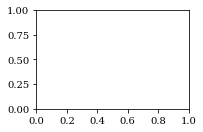

In [51]:
#Plot parameter maps for population-based AIF
from mpl_toolkits.axes_grid1 import make_axes_locatable

#pmapfont = {'family':'serif','color':'black','size':20}

plt.subplot(2, 2, 1)
plt.rcParams.update({'font.family':'serif'})
ax = plt.gca()
im = ax.imshow(ktrans_map[80:180, 90:180], vmin=0, cmap = 'viridis')
plt.title('$K^{trans}$', size = 19)
plt.axis('off')
plt.gcf().set_size_inches(10,13)
# Divide existing axes and create new axes
# at bottom side of image
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.2)
cb = plt.colorbar(im, cax=cax, orientation='horizontal')# label = '$10^{-3}$ $min^{-1}$') # Similar to fig.colorbar(im, cax = cax)
cb.set_label(label='$min^{-1}$', size=14)
cb.ax.tick_params(labelsize=12)
plt.gcf().set_size_inches(10,13)

plt.subplot(2,2,2)
plt.rcParams.update({'font.family':'serif'})
ax = plt.gca()
im = plt.imshow(kep_map[80:180, 90:180], vmin=0, cmap = 'viridis')
plt.title('$k_{ep}$', size = 19)
plt.axis('off')
plt.gcf().set_size_inches(10,13)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.2)
cb =  plt.colorbar(im, cax=cax, orientation='horizontal') # Similar to fig.colorbar(im, cax = cax)
cb.set_label(label='$min^{-1}$', size=12, weight='bold')
cb.ax.tick_params(labelsize=14)
plt.gcf().set_size_inches(10,13)

plt.subplot(2,2,3)
plt.rcParams.update({'font.family':'serif'})
ax = plt.gca()
im = plt.imshow(ve_map[80:180, 90:180], vmin=0, cmap = 'viridis')
plt.title('$v_e$', size = 19)
plt.axis('off')
plt.gcf().set_size_inches(10,13)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.2)
cb = plt.colorbar(im, cax=cax, orientation='horizontal') # Similar to fig.colorbar(im, cax = cax)
cb.ax.tick_params(labelsize=12)
plt.gcf().set_size_inches(10,13)

plt.subplot(2,2,4)
plt.rcParams.update({'font.family':'serif'})
ax = plt.gca()
im = plt.imshow(vp_map[80:180, 90:180], vmin=0, cmap = 'viridis')
plt.title('$v_p$', size = 19)
plt.axis('off')
plt.gcf().set_size_inches(10,13)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.2)
cb = plt.colorbar(im, cax=cax, orientation='horizontal') # Similar to fig.colorbar(im, cax = cax)
cb.ax.tick_params(labelsize=12)
plt.gcf().set_size_inches(10,13)
plt.savefig('H:/data/Results/PopAIF/pmap_popAIF_pdf.pdf', bbox_inches='tight')
plt.show()

In [85]:
#Running Tofts model for one patient using the manual AIF and saving all optimized parameters inside the tumor 

#Functions 
from tofts_method import *
from alignSeries_mod import *
#from mcflirt import *
from readdata import *

model_option = 'voxelwise'
read_option = 'mask2dce'

# Load patient data
patient_path = 'H:/data/master endometrial data/255/'
dce_path = os.path.join(patient_path, 'dce')
mask_path = os.path.join(patient_path, 'mask')
aif_path = os.path.join(patient_path, 'AIF')

#Read data 
MASK, DCE, timeline = readdata(mask_path, dce_path, read_option)

patientID = DCE.patientID

#Find pixel and voxel size
spacing = DCE.spacing
z = spacing[0]
y = spacing[1]
x = spacing[2]
pixel_size = x*y
voxel_size = x*y*z
voxel_ml = voxel_size*0.001 #milliliter
    

#Subtract pre-contrast signal from signal
DCE = DCE.astype('float32')
S0 = np.mean(DCE[0:5,:,:,:], axis=0)
dynim = DCE.copy()
for k in range(len(timeline)):
    dynim[k,:,:,:] = DCE[k,:,:,:] - S0
    
#Read AIF
AIF = Series(aif_path, 'time')
AIF_np = np.asarray(AIF)
#Find mean values inside AIF mask 
non_zero_in_AIF = np.nonzero(AIF_np) #index of nonzero elements in mask image
AIF_vals = dynim[:, non_zero_in_AIF[1], non_zero_in_AIF[2], non_zero_in_AIF[3]]
AIF_vals = np.asarray(np.mean(AIF_vals, axis=1), dtype='float')

#Calculate plasma concentration from the value of red blood cells 
cp = AIF_vals/(1-0.42) #42 percent hematocrit (red blood cells)
    
new_mask = MASK[10,:,:]
new_dce = np.asarray(dynim[:,10,:,:], dtype = 'float')

ktrans_map = np.copy(new_mask)
kep_map = np.copy(ktrans_map)
ve_map = np.copy(ktrans_map)
vp_map = np.copy(ktrans_map)

params = []
for y in range(new_mask.shape[0]): 
    for x in range(new_mask.shape[1]): 
        if new_mask[y,x] == 1.0:
            Cn = new_dce[:,y,x]
            try:
                opt_params, C_tofts_voxel = run_tofts(timeline, Cn, cp)
            except RuntimeError: 
                opt_params = {'Ktrans': np.nan, 
                              've':np.nan, 
                              'vp':np.nan, 
                              'kep':np.nan}
            params.append(opt_params)
            ktrans_map[y,x] = opt_params['Ktrans']*60
            kep_map[y,x] = opt_params['kep']*60
            vp_map[y,x] = opt_params['vp']
            ve_map[y,x] = opt_params['ve']

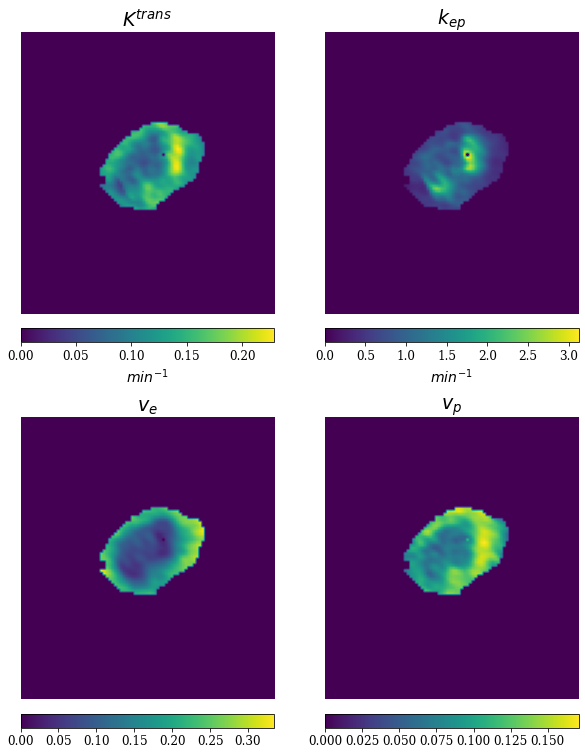

In [86]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

#pmapfont = {'family':'serif','color':'black','size':20}

plt.subplot(2, 2, 1)
plt.rcParams.update({'font.family':'serif'})
ax = plt.gca()
im = ax.imshow(ktrans_map[80:180, 90:180], vmin=0, cmap = 'viridis')
plt.title('$K^{trans}$', size=19)
plt.axis('off')
plt.gcf().set_size_inches(10,13)
# Divide existing axes and create new axes
# at bottom side of image
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.2)
cb = plt.colorbar(im, cax=cax, orientation='horizontal')# label = '$10^{-3}$ $min^{-1}$') # Similar to fig.colorbar(im, cax = cax)
cb.set_label(label='$min^{-1}$', size=14, weight='bold')
cb.ax.tick_params(labelsize=12)
plt.gcf().set_size_inches(10,13)

plt.subplot(2,2,2)
plt.rcParams.update({'font.family':'serif'})
ax = plt.gca()
im = plt.imshow(kep_map[80:180, 90:180], vmin=0, cmap = 'viridis')
plt.title('$k_{ep}$', size=19)
plt.axis('off')
plt.gcf().set_size_inches(10,13)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.2)
cb =  plt.colorbar(im, cax=cax, orientation='horizontal') # Similar to fig.colorbar(im, cax = cax)
cb.set_label(label='$min^{-1}$', size=14, weight='bold')
cb.ax.tick_params(labelsize=12)
plt.gcf().set_size_inches(10,13)

plt.subplot(2,2,3)
plt.rcParams.update({'font.family':'serif'})
ax = plt.gca()
im = plt.imshow(ve_map[80:180, 90:180], vmin=0, cmap = 'viridis')
plt.title('$v_e$', size=19)
plt.axis('off')
plt.gcf().set_size_inches(10,13)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.2)
cb = plt.colorbar(im, cax=cax, orientation='horizontal') # Similar to fig.colorbar(im, cax = cax)
cb.ax.tick_params(labelsize=12)
plt.gcf().set_size_inches(10,13)

plt.subplot(2,2,4)
plt.rcParams.update({'font.family':'serif'})
ax = plt.gca()
im = plt.imshow(vp_map[80:180, 90:180], vmin=0, cmap = 'viridis')
plt.title('$v_p$', size=19)
plt.axis('off')
plt.gcf().set_size_inches(10,13)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.2)
cb = plt.colorbar(im, cax=cax, orientation='horizontal') # Similar to fig.colorbar(im, cax = cax)
cb.ax.tick_params(labelsize=12)
plt.gcf().set_size_inches(10,13)
plt.savefig('H:/data/Results/ManualAIF/pmap_pdf.pdf', bbox_inches='tight')
plt.show()

print(new_mask.shape[0])

In [1]:
#Running Tofts model for one patient using the automatic AIF and saving all optimized parameters inside the tumor 
#Functions 
from AIF_deterministic import * 
from tofts_method import *
from alignSeries_mod import *
#from mcflirt import *
from readdata import *

model_option = 'voxelwise'
read_option = 'mask2dce'

# Load patient data
patient_path = 'H:/data/master endometrial data/255/'
dce_path = os.path.join(patient_path, 'dce')
mask_path = os.path.join(patient_path, 'mask')
aif_path = os.path.join(patient_path, 'AIF')

#Read data 
MASK, DCE, timeline = readdata(mask_path, dce_path, read_option)

patientID = DCE.patientID

#Find pixel and voxel size
spacing = DCE.spacing
z = spacing[0]
y = spacing[1]
x = spacing[2]
pixel_size = x*y
voxel_size = x*y*z
voxel_ml = voxel_size*0.001 #milliliter
    
Cb, Cb_params = find_deterministic_aif(DCE)
    
#Subtract pre-contrast signal from signal
DCE = DCE.astype('float32')
S0 = np.mean(DCE[0:5,:,:,:], axis=0)
dynim = DCE.copy()
for k in range(len(timeline)):
    dynim[k,:,:,:] = DCE[k,:,:,:] - S0
    
#Calculate plasma concentration from the value of red blood cells 
cp = Cb/(1-0.42) #42 percent hematocrit (red blood cells)
    
new_mask = MASK[10,:,:]
new_dce = np.asarray(dynim[:,10,:,:], dtype = 'float')

ktrans_map = np.copy(new_mask)
kep_map = np.copy(ktrans_map)
ve_map = np.copy(ktrans_map)
vp_map = np.copy(ktrans_map)

params = []
for y in range(new_mask.shape[0]): 
    for x in range(new_mask.shape[1]): 
        if new_mask[y,x] == 1.0:
            Cn = new_dce[:,y,x]
            try:
                opt_params, C_tofts_voxel = run_tofts(timeline, Cn, cp)
            except RuntimeError: 
                opt_params = {'Ktrans': np.nan, 
                              've':np.nan, 
                              'vp':np.nan, 
                              'kep':np.nan}
            params.append(opt_params)
            ktrans_map[y,x] = opt_params['Ktrans']*60
            kep_map[y,x] = opt_params['kep']*60
            vp_map[y,x] = opt_params['vp']
            ve_map[y,x] = opt_params['ve']

80
Both `ftol` and `xtol` termination conditions are satisfied.
Function evaluations 20, initial cost 5.2366e+01, final cost 6.3685e-02, first-order optimality 7.66e-03.
estimate_parkers_model: result.cost: 0.06368492698589386
estimate_parkers_model: A1    :  0.809  0.012
estimate_parkers_model: A2    :  0.330  0.165
estimate_parkers_model: T1    :  0.170  0.164
estimate_parkers_model: T2    :  0.365  0.773
estimate_parkers_model: sigma1:  0.056  0.211
estimate_parkers_model: sigma2:  0.132  0.067
estimate_parkers_model: alpha :  1.050  0.803
estimate_parkers_model: beta  :  0.169  0.070
estimate_parkers_model: s     : 38.078 18.244
estimate_parkers_model: tau   :  0.483  0.863
80
`ftol` termination condition is satisfied.
Function evaluations 16, initial cost 4.9939e+01, final cost 5.0121e-01, first-order optimality 2.47e-01.
estimate_parkers_model: result.cost: 0.5012132827583473
estimate_parkers_model: A1    :  0.809  0.153
estimate_parkers_model: A2    :  0.330  0.083
estimate_park


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


`ftol` termination condition is satisfied.
Function evaluations 16, initial cost 5.2692e+01, final cost 5.5113e-02, first-order optimality 1.29e-02.
estimate_parkers_model: result.cost: 0.05511277385060322
estimate_parkers_model: A1    :  0.809  0.037
estimate_parkers_model: A2    :  0.330  0.156
estimate_parkers_model: T1    :  0.170  0.467
estimate_parkers_model: T2    :  0.365  0.769
estimate_parkers_model: sigma1:  0.056  0.500
estimate_parkers_model: sigma2:  0.132  0.066
estimate_parkers_model: alpha :  1.050  0.655
estimate_parkers_model: beta  :  0.169  0.081
estimate_parkers_model: s     : 38.078 19.918
estimate_parkers_model: tau   :  0.483  0.861



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

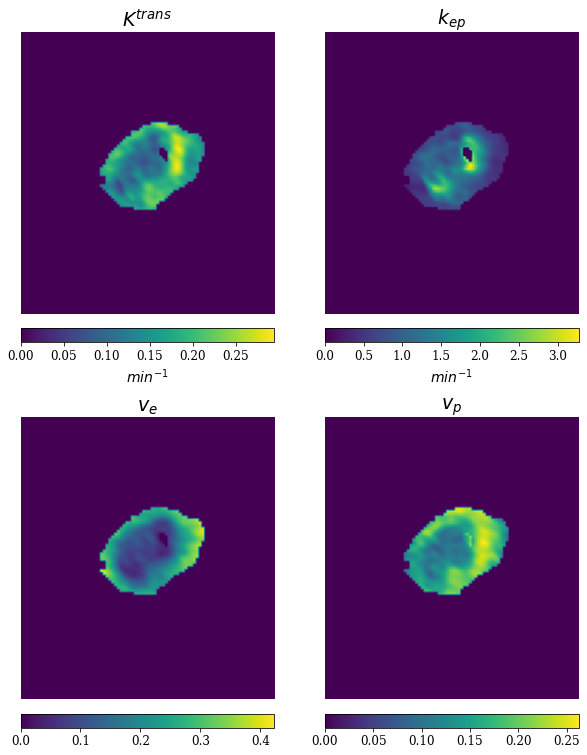

In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

#pmapfont = {'family':'serif','color':'black','size':20}

plt.subplot(2, 2, 1)
plt.rcParams.update({'font.family':'serif'})
ax = plt.gca()
im = ax.imshow(ktrans_map[80:180, 90:180], vmin=0, cmap = 'viridis')
plt.title('$K^{trans}$', size=19)
plt.axis('off')
plt.gcf().set_size_inches(10,13)
# Divide existing axes and create new axes
# at bottom side of image
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.2)
cb = plt.colorbar(im, cax=cax, orientation='horizontal')# label = '$10^{-3}$ $min^{-1}$') # Similar to fig.colorbar(im, cax = cax)
cb.set_label(label='$min^{-1}$', size=14, weight='bold')
cb.ax.tick_params(labelsize=12)
plt.gcf().set_size_inches(10,13)

plt.subplot(2,2,2)
plt.rcParams.update({'font.family':'serif'})
ax = plt.gca() 
im = plt.imshow(kep_map[80:180, 90:180], vmin=0, cmap = 'viridis')
plt.title('$k_{ep}$', size = 19)
plt.axis('off')
plt.gcf().set_size_inches(10,13)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.2)
cb =  plt.colorbar(im, cax=cax, orientation='horizontal') # Similar to fig.colorbar(im, cax = cax)
cb.set_label(label='$min^{-1}$', size=14, weight='bold')
cb.ax.tick_params(labelsize=12)
plt.gcf().set_size_inches(10,13)

plt.subplot(2,2,3)
plt.rcParams.update({'font.family':'serif'})
ax = plt.gca()
im = plt.imshow(ve_map[80:180, 90:180], vmin=0, cmap = 'viridis')
plt.title('$v_e$', size = 19)
plt.axis('off')
plt.gcf().set_size_inches(10,13)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.2)
cb = plt.colorbar(im, cax=cax, orientation='horizontal') # Similar to fig.colorbar(im, cax = cax)
cb.ax.tick_params(labelsize=12)
plt.gcf().set_size_inches(10,13)

plt.subplot(2,2,4)
plt.rcParams.update({'font.family':'serif'})
ax = plt.gca()
im = plt.imshow(vp_map[80:180, 90:180], vmin=0, cmap = 'viridis')
plt.title('$v_p$', size=19)
plt.axis('off')
plt.gcf().set_size_inches(10,13)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.2)
cb = plt.colorbar(im, cax=cax, orientation='horizontal') # Similar to fig.colorbar(im, cax = cax)
cb.ax.tick_params(labelsize=12)
plt.gcf().set_size_inches(10,13)
plt.savefig('H:/data/Results/AutoAIF/pmap_3p_pdf.pdf', bbox_inches='tight')
plt.show()

In [113]:
# load aif array

import pandas as pd

etm_df = pd.read_csv('H:/data/Results/ETM_resultater_redcap.csv')
etm_df = etm_df.loc[etm_df['voxel_ktrans'] > 0]
etm_df = etm_df[['record_id', 'average_ktrans', 'average_ve', 'average_vp', 'average_kep', 'voxel_ktrans', 'voxel_ve', 'voxel_vp', 'voxel_kep', 'mask', 'average_tumor_volume']]
etm_df['record_id'] = etm_df['record_id'].str.lstrip('GYN ')
etm_df['record_id'] = etm_df['record_id'].str.lstrip('0')
avrg_kt_array = (etm_df['average_ktrans'].to_numpy())*60
voxel_kt_array = (etm_df['voxel_ktrans'].to_numpy())*60
tumor_vol = etm_df['average_tumor_volume'].to_numpy()
avrg_kep_array = (etm_df['average_kep'].to_numpy())*60
avrg_ve_array = etm_df['average_ve'].to_numpy()
avrg_vp_array = etm_df['average_vp'].to_numpy()
voxel_kep_array = (etm_df['voxel_kep'].to_numpy())*60
voxel_ve_array = etm_df['voxel_ve'].to_numpy()
voxel_vp_array = etm_df['voxel_vp'].to_numpy()
etm_df = etm_df.astype(str)
etm_df

,record_id,average_ktrans,average_ve,average_vp,average_kep,voxel_ktrans,voxel_ve,voxel_vp,voxel_kep,mask,average_tumor_volume
0,11,0.0027570545458375,0.33300384034525,0.19434023463729,0.0082793475984513,0.0029569323047186,0.34370684813453,0.19162286493602,0.009318851933125,JAD,5.0605773925781
1,17,0.0038760068630746,0.23479559605411,0.19458010434826,0.016508004955005,0.0040412981181506,0.24616275687433,0.19340725552181,0.018301928430855,JAD,18.855285644531
2,20,0.0045062043549888,0.47148184221763,0.20277671683091,0.0095575353099363,0.0053189297615244,0.49583902902708,0.1953807763409,0.012245098349744,JAD,28.056335449219
3,25,0.0034373880299879,0.35193672158107,0.18387946209921,0.0097670627110053,0.0038635439398666,0.36431619462769,0.17903087034637,0.011686230633509,JAD,44.563293457031
4,28,0.0025297304524742,0.21753055101009,0.15891282141238,0.011629311104705,0.0028019873665026,0.24977230662832,0.15625952005766,0.012618588448055,JAD,13.911437988281
...,...,...,...,...,...,...,...,...,...,...,...
58,238,0.0011951176810908,0.12916343111294,0.11832496947344,0.0092527557590647,0.0014672291685789,0.16930631960675,0.11582968914471,0.012701411177677,JAD,17.763519287109
59,246,0.0011272226724779,0.12032786076764,0.26356916528479,0.0093679274715488,0.0013593342044449,0.3343139406713,0.26194425817536,0.010217638548657,KWL,7.3883056640625
60,252,0.0043435239403866,0.54418803677456,0.54483837785884,0.007981660100672,0.0052671170070209,0.57843631485951,0.53627780873764,0.014046315475568,JAD,26.669311523438
61,255,0.000804181466333,0.087412271267361,0.18271348450027,0.0091998692480302,0.0009219269784125,0.18800603535563,0.18266365724853,0.010792468822426,KWL,23.078155517578


In [121]:
#Kolmogorov-Smirnov to test if the data is normally distributed 
ks_result = kstest(avrg_kt_array, cdf = 'norm')
if ks_result[1] > 0.05: #t-test if the data is normally distributed 
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    t_test = stats.ttest_rel(avrg_kt_array, voxel_kt_array)
    print(t_test)
else: 
    print('Data is not normally distributed')
    print(f"K-S statistic: {ks_result[0]}")
    print(f"p-value: {ks_result[1]}")
    #mann_whitney = mannwhitneyu(np.array(Kt_avrg), np.array(Kt_voxel))
    #print(mann_whitney)
    res  = wilcoxon(avrg_kt_array, voxel_kt_array)
    print('Wilcoxon p-value:', res.pvalue)
    print('Wilcoxon z-statistic:', res.statistic)

Data is not normally distributed
K-S statistic: 0.510289123476975
p-value: 9.676774567718755e-16
Wilcoxon p-value: 1.6296951775896109e-07
Wilcoxon z-statistic: 243.0


In [115]:
print(np.median(avrg_kt_array))
print(np.median(voxel_kt_array))


0.16303876554396599
0.170609254288266


63


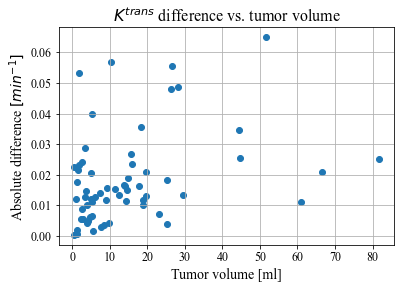

In [120]:
import matplotlib.pyplot as plt
print(len(avrg_kt_array))
diff = abs(avrg_kt_array-voxel_kt_array)
fig = plt.figure()
plt.rcParams.update({'font.family':'Times New Roman'})
plt.scatter(tumor_vol, diff, color='tab:blue')
#plt.scatter(tumor_vol, voxel_kt_array, label='voxelwise', color='tab:orange', marker='*')
#plt.legend(fontsize=label_fontsize)
plt.xticks(size=tick_size)
plt.yticks(size=tick_size)
plt.xlabel('Tumor volume [ml]', size=label_fontsize)
plt.ylabel('Absolute difference $[min^{-1}]$', size=label_fontsize)
plt.title('$K^{trans}$ difference vs. tumor volume', size=title_fontsize)
#plt.ylim(0,0.05)
plt.grid()
fig.savefig('H:/data/Results/rPACS/ktrans_vs_tumorvol_rPACS.eps', bbox_inches='tight')

Bias percent: -7.001524434342786


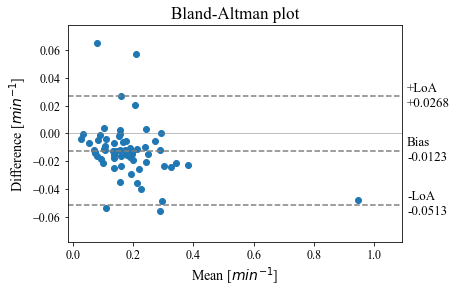

In [117]:
fig = plt.figure()
bland_altman_plot(avrg_kt_array, voxel_kt_array, 1.11)
plt.xticks(size=tick_size)
plt.yticks(size=tick_size)
plt.title('Bland-Altman plot', size=17)
fig.savefig('H:/data/Results/rPACS/Bland_altman_rPACS.eps', bbox_inches='tight')

In [79]:
#Pearson correlation 
pearson = stats.pearsonr(avrg_kt_array, voxel_kt_array)
print(pearson)

#Spearman correlation 
spearman = spearmanr(avrg_kt_array, voxel_kt_array)
print(spearman)

PearsonRResult(statistic=0.9887100998576797, pvalue=5.317975783236416e-52)
SpearmanrResult(correlation=0.9722062211981566, pvalue=3.5957180307972326e-40)


In [80]:
avrg_mean_kt = avrg_kt_array.mean()
avrg_std_kt = avrg_kt_array.std()
print('Average', avrg_mean_kt,'+-', avrg_std_kt)
voxel_mean_kt = voxel_kt_array.mean()
voxel_std_kt = voxel_kt_array.std()
print('Voxel', voxel_mean_kt, '+-', voxel_std_kt)
print()
avrg_mean_kep = avrg_kep_array.mean()
avrg_std_kep = avrg_kep_array.std()
print('Average', avrg_mean_kep, '+-',avrg_std_kep)
voxel_mean_kep = voxel_kep_array.mean()
voxel_std_kep = voxel_kep_array.std()
print('Voxel', voxel_mean_kep, '+-', voxel_std_kep)
print()
avrg_mean_ve= avrg_ve_array.mean()
avrg_std_ve = avrg_ve_array.std()
print(avrg_mean_ve, '+-',avrg_std_ve)
voxel_mean_ve = voxel_ve_array.mean()
voxel_std_ve = voxel_ve_array.std()
print(voxel_mean_ve, '+-', voxel_std_ve)
print()
avrg_mean_vp= avrg_vp_array.mean()
avrg_std_vp = avrg_vp_array.std()
print(avrg_mean_vp, '+-',avrg_std_vp)
voxel_mean_vp = voxel_vp_array.mean()
voxel_std_vp = voxel_vp_array.std()
print(voxel_mean_vp, '+-', voxel_std_vp)

print('Difference')
print('Kt:', abs(avrg_mean_kt-voxel_mean_kt), 'Percent:', ((abs(avrg_mean_kt-voxel_mean_kt))/((avrg_mean_kt + voxel_mean_kt)/2) * 100))
print('kep:', abs(avrg_mean_kep-voxel_mean_kep), 'Percent:', ((abs(avrg_mean_kep-voxel_mean_kep))/((avrg_mean_kep + voxel_mean_kep)/2) * 100))
print('ve:', abs(avrg_mean_ve-voxel_mean_ve), 'Percent:', ((abs(avrg_mean_ve-voxel_mean_ve))/((avrg_mean_ve + voxel_mean_ve)/2) * 100))
print('vp:', abs(avrg_mean_vp-voxel_mean_vp), 'Percent:', ((abs(avrg_mean_vp-voxel_mean_vp))/((avrg_mean_vp + voxel_mean_vp)/2) * 100))

Average 0.17780058438690916 +- 0.12095312640865002
Voxel 0.19008483817798427 +- 0.12748524716754595

Average 0.6697618620299496 +- 0.5211277991583229
Voxel 0.8173663240238939 +- 0.547176999585354

0.33894036786263215 +- 0.2109567753744428
0.3787153369499336 +- 0.17957653186192737

0.20437881413683395 +- 0.10703099552186596
0.2031776321364112 +- 0.10609812098320309
Difference
Kt: 0.012284253791075117 Percent: 6.678304187988436
kep: 0.14760446199394428 Percent: 19.850940003446354
ve: 0.03977496908730144 Percent: 11.084693905607477
vp: 0.0012011820004227403 Percent: 0.5894555276485117


In [81]:
avrg_median_kt = np.median(avrg_kt_array)
avrg_median_kt

0.16303876554396599

In [82]:
hist_df_og = pd.read_csv('H:/data/master endometrial data/patientsTilIngrid20230424.csv')

hist_df = hist_df_og[['Subj', 'TimeFollowUp', 'StatusFollowUp', 'HistGrade2G']]

#Se alle verdier for å sjekke NaN verdier
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(hist_df)
hist_df = hist_df.dropna()
hist_df.rename(columns = {'Subj':'record_id'}, inplace = True)
hist_df = hist_df.astype(str)
print('152' in hist_df['record_id'].unique())
hist_df

False


,record_id,TimeFollowUp,StatusFollowUp,HistGrade2G
0,7,102.0,1.0,0
1,8,102.0,1.0,1
2,9,102.0,1.0,0
3,10,101.0,1.0,0
4,11,102.0,1.0,1
...,...,...,...,...
506,565,1.0,1.0,1
507,566,0.0,1.0,0
508,567,0.0,1.0,0
509,568,1.0,2.0,0


In [90]:
#Status follow up = 5 means dead by desease
result_df = pd.merge(etm_df, hist_df, how='inner', on='record_id')
result_Kt = ((result_df['average_ktrans'].astype(float)).to_numpy())*60
result_kep = ((result_df['average_kep'].astype(float)).to_numpy())*60
result_vp = ((result_df['average_vp'].astype(float)).to_numpy())
result_ve = ((result_df['average_ve'].astype(float)).to_numpy())
histgrade = ((result_df['HistGrade2G'].astype(float)).to_numpy())

In [91]:
#Status follow up = 5 means dead by desease
result_Kt = ((result_df['voxel_ktrans'].astype(float)).to_numpy())*60
result_kep = ((result_df['voxel_kep'].astype(float)).to_numpy())*60
result_vp = ((result_df['voxel_vp'].astype(float)).to_numpy())
result_ve = ((result_df['voxel_ve'].astype(float)).to_numpy())
print(result_vp)

[1.91622865e-01 1.93407256e-01 1.95380776e-01 1.79030870e-01
 1.56259520e-01 2.38830222e-01 2.72073850e-01 2.21075744e-01
 2.68874962e-01 1.11545843e-02 2.23172382e-01 1.15745292e-01
 1.51821694e-01 2.00411470e-01 2.70261981e-01 3.49383608e-01
 1.39395196e-01 5.75648065e-03 3.48991145e-01 4.91226485e-04
 1.11109243e-01 3.17786030e-01 2.50185887e-01 2.47068225e-01
 4.62235263e-01 8.58375646e-02 2.65833261e-01 2.90319538e-01
 2.51129678e-01 2.19525663e-01 5.48463135e-02 3.00620284e-01
 1.84376751e-01 1.49544270e-01 9.00151761e-02 2.35147042e-01
 1.05904291e-01 1.69924696e-01 1.37480431e-01 1.66387136e-01
 3.60158093e-01 3.38536689e-01 4.34341135e-01 1.86678102e-01
 1.64646352e-01 2.67116691e-01 1.28006546e-01 2.41436526e-01
 6.44009856e-02 1.10421291e-01 6.91303650e-02 1.88795235e-01
 2.30271979e-01 5.02156731e-02 2.65351551e-01 1.15829689e-01
 2.61944258e-01 5.36277809e-01 1.82663657e-01 2.65286087e-01]


In [92]:
#Split Ktrans by median
#Trenger nok ikke noe av dette
sorted_kt = sorted(result_Kt)
index = np.argsort(result_Kt)
median_index = len(result_Kt)//2
kt_lower, kt_upper = sorted_kt[:median_index],sorted_kt[median_index:]

lower_index, upper_index = index[:median_index], index[median_index:]

histgrade_lower = []
histgrade_upper = []
sorted_histgrade = []
for i in lower_index: 
    histgrade_lower.append(histgrade[i])
for i in upper_index: 
    histgrade_upper.append(histgrade[i])
for i in index: 
    sorted_histgrade.append(histgrade[i])

In [93]:
median = np.median(result_Kt)

observed_kt = []
for i in result_Kt: 
    if i < median: 
        observed_kt.append(1)
    elif i > median: 
        observed_kt.append(0)

In [94]:
expected_lower = observed_kt.count(0)
observed_lower =  histgrade.size - np.count_nonzero(histgrade==1)

np.savetxt("H:/data/master endometrial data/observed_kt.csv", np.array(observed_kt), delimiter=",")
np.savetxt("H:/data/master endometrial data/histgrade.csv", np.array(histgrade), delimiter=",")

expected_upper = observed_kt.count(1)
observed_upper = np.count_nonzero(histgrade == 1)

In [95]:
observed_upper = np.array([histgrade_upper.count(0.0), histgrade_upper.count(1.0)])
observed_lower = np.array([histgrade_lower.count(0.0), histgrade_lower.count(1.0)])

expected_lower = np.array([0, 30])
expected_upper = np.array([30, 0])

In [96]:
observed = np.array([observed_lower, observed_upper])
print(observed)
expected = np.array([expected_lower, expected_upper])
print(expected)

[[21  9]
 [19 11]]
[[ 0 30]
 [30  0]]


In [97]:
expected_lower = observed_kt.count(0) #Denne verdien er 30
observed_lower =  histgrade.size - np.count_nonzero(histgrade==1) #Denne verdien er 40

expected_upper = observed_kt.count(1) #Denne verdien er 30
observed_upper = np.count_nonzero(histgrade == 1) #Denne verdien er 20

#Chi-square test
from scipy.stats import chisquare
chisquare_res = chisquare([[observed_lower,observed_upper], [expected_lower, expected_upper]]) # chisquare([[40,20], [30,30]])
print(chisquare_res)

Power_divergenceResult(statistic=array([1.42857143, 2.        ]), pvalue=array([0.23199772, 0.15729921]))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0.    0.025 0.075 0.075 0.1   0.1   0.15  0.15  0.175 0.175 0.2   0.2
 0.35  0.35  0.45  0.45  0.475 0.475 0.675 0.675 0.75  0.75  0.775 0.775
 0.9   0.9   0.925 0.925 1.   ]
[0.   0.   0.   0.1  0.1  0.2  0.2  0.25 0.25 0.3  0.3  0.4  0.4  0.45
 0.45 0.55 0.55 0.65 0.65 0.7  0.7  0.8  0.8  0.9  0.9  0.95 0.95 1.
 1.  ]
0.5587500000000001


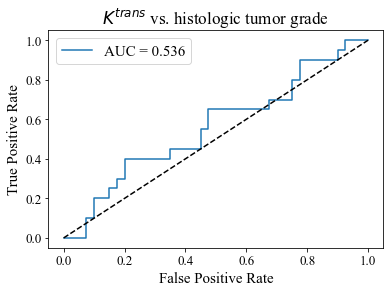

In [136]:
from sklearn.metrics import roc_curve, roc_auc_score
#fpr_lower, tpr_lower, _ = metrics.roc_curve(histgrade_lower, kt_lower)
#fpr_upper, tpr_upper, _ = metrics.roc_curve(histgrade_upper, kt_upper)
fpr, tpr, _ = roc_curve(histgrade, result_Kt)
auc_score = roc_auc_score(histgrade, result_Kt)
print(fpr)
print(tpr)
print(auc_score)
#Tror y-score må være sannsynligheter? 
#create ROC curve
#plt.plot(fpr_lower,tpr_lower)
#plt.plot(fpr_upper, tpr_upper)
# Set font family globally
plt.rcParams['font.family'] = 'Times New Roman'

#legend_fontsize = 15
label_fontsize = 15
title_fontsize = 17
tick_size=13

plt.plot(fpr, tpr, 'tab:blue', label = 'AUC = 0.536' )
plt.plot([0, 1], [0, 1], "k--")
plt.legend(fontsize=label_fontsize)
plt.xticks(size=tick_size)
plt.yticks(size=tick_size)
plt.ylabel('True Positive Rate', size=label_fontsize)
plt.xlabel('False Positive Rate', size=label_fontsize)
plt.title('$K^{trans}$ vs. histologic tumor grade', size=title_fontsize)
plt.savefig('H:/data/Results/ROC_kt_histgrade.eps', bbox_inches = 'tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0.    0.025 0.05  0.05  0.125 0.125 0.2   0.2   0.25  0.25  0.35  0.35
 0.4   0.4   0.475 0.475 0.525 0.525 0.6   0.6   0.725 0.725 0.75  0.75
 0.775 0.775 0.825 0.825 0.95  0.95  1.   ]
[0.   0.   0.   0.05 0.05 0.1  0.1  0.15 0.15 0.25 0.25 0.35 0.35 0.4
 0.4  0.6  0.6  0.65 0.65 0.75 0.75 0.8  0.8  0.85 0.85 0.9  0.9  0.95
 0.95 1.   1.  ]
0.51875


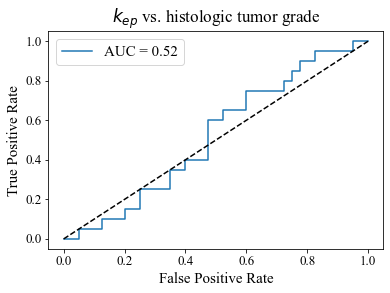

In [132]:
fpr, tpr, _ = roc_curve(histgrade, result_kep)
auc_score = roc_auc_score(histgrade, result_kep)
print(fpr)
print(tpr)
print(auc_score)
#Tror y-score må være sannsynligheter? 
#create ROC curve
#plt.plot(fpr_lower,tpr_lower)
#plt.plot(fpr_upper, tpr_upper)
plt.plot(fpr, tpr, 'tab:blue', label = 'AUC = 0.52' )
plt.plot([0, 1], [0, 1], "k--")
plt.legend(fontsize=label_fontsize)
plt.xticks(size = tick_size)
plt.yticks(size=tick_size)
plt.ylabel('True Positive Rate', size=label_fontsize)
plt.xlabel('False Positive Rate', size = label_fontsize)
plt.title('$k_{ep}$ vs. histologic tumor grade', size=title_fontsize)
plt.savefig('H:/data/Results/ROC_kep_histgrade.eps', bbox_inches = 'tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0.    0.025 0.05  0.05  0.075 0.075 0.2   0.2   0.225 0.225 0.325 0.325
 0.45  0.45  0.475 0.475 0.55  0.55  0.575 0.575 0.65  0.65  0.725 0.725
 0.775 0.775 0.875 0.875 1.   ]
[0.   0.   0.   0.05 0.05 0.1  0.1  0.2  0.2  0.25 0.25 0.3  0.3  0.35
 0.35 0.45 0.45 0.65 0.65 0.7  0.7  0.75 0.75 0.85 0.85 0.9  0.9  1.
 1.  ]
0.50625


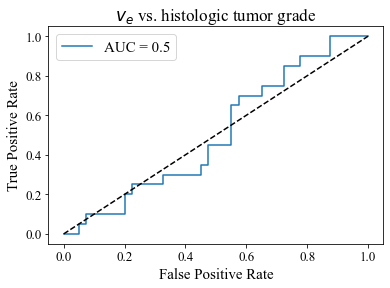

In [133]:
fpr, tpr, _ = roc_curve(histgrade, result_ve)
auc_score = roc_auc_score(histgrade, result_ve)
print(fpr)
print(tpr)
print(auc_score)
#Tror y-score må være sannsynligheter? 
#create ROC curve
#plt.plot(fpr_lower,tpr_lower)
#plt.plot(fpr_upper, tpr_upper)

plt.rcParams['font.family'] = 'Times New Roman'


plt.plot(fpr, tpr, 'tab:blue', label = 'AUC = 0.5' )
plt.plot([0, 1], [0, 1], "k--")
plt.legend(fontsize=label_fontsize)
plt.xticks(size=tick_size)
plt.yticks(size=tick_size)
plt.ylabel('True Positive Rate', size=label_fontsize)
plt.xlabel('False Positive Rate', size=label_fontsize)
plt.title('$v_e$ vs. histologic tumor grade', size=title_fontsize)
plt.savefig('H:/data/Results/ROC_ve_histgrade.eps', bbox_inches = 'tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0.    0.025 0.025 0.075 0.075 0.1   0.1   0.15  0.15  0.225 0.225 0.35
 0.35  0.45  0.45  0.475 0.475 0.55  0.55  0.625 0.625 0.65  0.65  0.7
 0.7   0.75  0.75  1.   ]
[0.   0.   0.1  0.1  0.15 0.15 0.2  0.2  0.25 0.25 0.3  0.3  0.35 0.35
 0.45 0.45 0.65 0.65 0.75 0.75 0.8  0.8  0.85 0.85 0.9  0.9  1.   1.  ]
0.58375


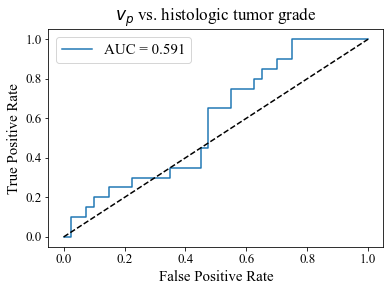

In [134]:
fpr, tpr, _ = roc_curve(histgrade, result_vp)
auc_score = roc_auc_score(histgrade, result_vp)
print(fpr)
print(tpr)
print(auc_score)
#Tror y-score må være sannsynligheter? 
#create ROC curve
#plt.plot(fpr_lower,tpr_lower)
#plt.plot(fpr_upper, tpr_upper)

plt.rcParams['font.family'] = 'Times New Roman'

plt.plot(fpr, tpr, 'tab:blue', label = 'AUC = 0.591' )
plt.plot([0, 1], [0, 1], "k--")
plt.legend(fontsize=label_fontsize)
plt.xticks(size=tick_size)
plt.yticks(size=tick_size)
plt.ylabel('True Positive Rate', size = label_fontsize)
plt.xlabel('False Positive Rate', size = label_fontsize)
plt.title('$v_p$ vs. histologic tumor grade', size=title_fontsize)
plt.savefig('H:/data/Results/ROC_vp_histgrade.eps', bbox_inches = 'tight')
plt.show()

In [255]:
high_grade = result_df.loc[result_df['HistGrade2G'] == '1']
low_grade = result_df.loc[result_df['HistGrade2G'] == '0']

In [256]:
#High grade values
avrg_kt_high = ((high_grade['average_ktrans'].astype(float)).to_numpy())*60
voxel_kt_high = ((high_grade['voxel_ktrans'].astype(float)).to_numpy())*60
tumor_vol = (high_grade['average_tumor_volume'].astype(float)).to_numpy()
avrg_kep_high = ((high_grade['average_kep'].astype(float)).to_numpy())*60
avrg_ve_high = (high_grade['average_ve'].astype(float)).to_numpy()
avrg_vp_high = (high_grade['average_vp'].astype(float)).to_numpy()
voxel_kep_high = ((high_grade['voxel_kep'].astype(float)).to_numpy())*60
voxel_ve_high = (high_grade['voxel_ve'].astype(float)).to_numpy()
voxel_vp_high = (high_grade['voxel_vp'].astype(float)).to_numpy()
print(len(avrg_kt_high))

20


In [258]:
#print('Median Kt:', np.median(avrg_kt_high))
print('Mean Kt:', np.mean(avrg_kt_high), 'Std:', np.std(avrg_kt_high))
#print('Median kep:', np.median(avrg_kep_high))
print('Mean kep:', np.mean(avrg_kep_high), 'Std:', np.std(avrg_kep_high))
#print('Median ve:', np.median(avrg_ve_high))
print('Mean ve:', np.mean(avrg_ve_high), 'Std:', np.std(avrg_ve_high))
#print('Median vp:', np.median(avrg_vp_high))
print('Mean vp:', np.mean(avrg_vp_high), 'Std:', np.std(avrg_vp_high))

Mean Kt: 0.17327429063068503 Std: 0.07794016634073514
Mean kep: 0.6131266798158406 Std: 0.2996796941087045
Mean ve: 0.3229714461833205 Std: 0.1756952636423276
Mean vp: 0.23268976323476748 Std: 0.09480833575677712


In [259]:
#Low grade grade 
avrg_kt_low = ((low_grade['average_ktrans'].astype(float)).to_numpy())*60
voxel_kt_low = ((low_grade['voxel_ktrans'].astype(float)).to_numpy())*60
avrg_kep_low = ((low_grade['average_kep'].astype(float)).to_numpy())*60
avrg_ve_low = (low_grade['average_ve'].astype(float)).to_numpy()
avrg_vp_low = (low_grade['average_vp'].astype(float)).to_numpy()
voxel_kep_low = ((low_grade['voxel_kep'].astype(float)).to_numpy())*60
voxel_ve_low = (low_grade['voxel_ve'].astype(float)).to_numpy()
voxel_vp_low = (low_grade['voxel_vp'].astype(float)).to_numpy()

In [260]:
#print('Median Kt:', np.median(avrg_kt_low))
print('Mean Kt:', np.mean(avrg_kt_low), 'Std:', np.std(avrg_kt_low))
#print('Median kep:', np.median(avrg_kep_low))
print('Mean kep:', np.mean(avrg_kep_low), 'Std:', np.std(avrg_kep_low))
#print('Median ve:', np.median(avrg_ve_low))
print('Mean ve:', np.mean(avrg_ve_low), 'Std:', np.std(avrg_ve_low))
#print('Median vp:', np.median(avrg_vp_low))
print('Mean vp:', np.mean(avrg_vp_low), 'Std:', np.std(avrg_vp_low))

Mean Kt: 0.178162895168553 Std: 0.14042811412681644
Mean kep: 0.714472969988542 Std: 0.6119503103357311
Mean ve: 0.3354759158175287 Std: 0.22155204560150174
Mean vp: 0.19267418927320845 Std: 0.11170780773726509


Average
Kt: 0.12460572544007639 std: 0.05319420350489013
kep: 0.7884164369619182 std: 0.6327441632508166
ve: 0.24819339960047543 std: 0.20227156707898064
vp: 0.19040980613942537 std: 0.07546434221206667


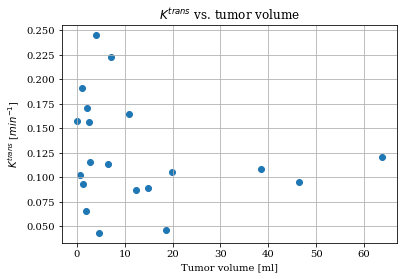

In [35]:
#Population-based AIF
import json
import numpy as np
import matplotlib.pyplot as plt
'''
Plotting the difference in Ktrans values from average and voxelwise modelling versus the tumor volume
'''
f_avr = open('H:/data/Results/PopAIF/output_average_eroded.json')
#f_vox = open('H:/data/Results/PopAIF/output_voxelwise.json')

avr_data = json.load(f_avr)
#vox_data = json.load(f_vox)

#Kt_diff = []
Kt_avrg = []
#Kt_voxel = []
kep_avrg = []
#kep_voxel = []
ve_avrg = []
#ve_voxel = []
vp_avrg = []
#vp_voxel = []
tumor_vol = []

for i in range(0,len(avr_data)): 
    tumor_vol.append(avr_data[i]['tumor_volume'])
    Kt_avrg.append(avr_data[i]['Ktrans']*60)
    kep_avrg.append(avr_data[i]['kep']*60)
    ve_avrg.append(avr_data[i]['ve'])
    vp_avrg.append(avr_data[i]['vp'])
fig1 = plt.figure(1)
plt.rcParams.update({'font.family':'serif'})
plt.scatter(tumor_vol, Kt_avrg)
plt.xlabel('Tumor volume [ml]')
plt.ylabel('$K^{trans}$ [$min^{-1}$]')
plt.title('$K^{trans}$ vs. tumor volume')
plt.grid()
fig1.savefig('H:/data/Results/PopAIF/tumorvol_vs_Kt_popAIF_eroded_mask.eps', bbox_inches='tight')


print('Average')
print('Kt:', np.array(Kt_avrg).mean(), 'std:', np.array(Kt_avrg).std())
print('kep:', np.array(kep_avrg).mean(), 'std:', np.array(kep_avrg).std())
print('ve:', np.array(ve_avrg).mean(), 'std:', np.array(ve_avrg).std())
print('vp:', np.array(vp_avrg).mean(), 'std:', np.array(vp_avrg).std()) 

[0.20160530948876895, 0.23270293480284254, 0.21997121348563858, 0.24656610575787163, 0.23771623907458964, 0.18580104514537532, 0.09507562950120588, 0.17441613608330606, 0.40740000577047236, 0.28447595092012595, 0.263619487512572, 0.08486328901878211, 0.06519817173746954, 0.11263542629647633, 0.07392261961581359, 0.26773316585908513, 0.27101564711773896, 0.10297035183185328, 0.18987744265957174, 0.28452842661821565]
Average
Kt: 0.13854525754281516 std: 0.060209980148628495
kep: 0.683748974749137 std: 0.4969604241262322
ve: 0.2813055566271751 std: 0.19043978293081126
vp: 0.20010472991488876 std: 0.08728533924906044


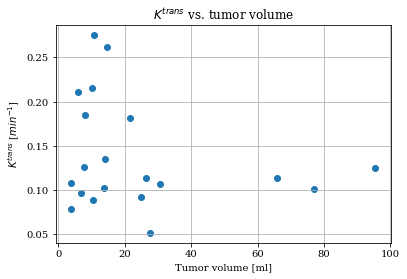

In [34]:
#Population-based AIF
'''
Plotting the difference in Ktrans values from average and voxelwise modelling versus the tumor volume
'''
f_avr = open('H:/data/Results/PopAIF/output_average_dilated.json')
#f_vox = open('H:/data/Results/PopAIF/output_voxelwise.json')

avr_data = json.load(f_avr)
#vox_data = json.load(f_vox)

#Kt_diff = []
Kt_avrg = []
#Kt_voxel = []
kep_avrg = []
#kep_voxel = []
ve_avrg = []
#ve_voxel = []
vp_avrg = []
#vp_voxel = []
tumor_vol = []

for i in range(0,len(avr_data)): 
    tumor_vol.append(avr_data[i]['tumor_volume'])
    Kt_avrg.append(avr_data[i]['Ktrans']*60)
    kep_avrg.append(avr_data[i]['kep']*60)
    ve_avrg.append(avr_data[i]['ve'])
    vp_avrg.append(avr_data[i]['vp'])
print(vp_avrg)
    
vol_arr = np.array(tumor_vol)
sort_vol = np.sort(vol_arr)
sort_index = np.argsort(vol_arr)

#res = [val for (_, val) in sorted(zip(sort_index, Kt_diff), key=lambda x: x[0])]

fig1 = plt.figure(1)
plt.rcParams.update({'font.family':'serif'})
plt.scatter(vol_arr, Kt_avrg)
plt.xlabel('Tumor volume [ml]')
plt.ylabel('$K^{trans}$ [$min^{-1}$]')
plt.title('$K^{trans}$ vs. tumor volume')
plt.grid()
fig1.savefig('H:/data/Results/PopAIF/tumorvol_vs_Ktdiff_popAIF.eps', bbox_inches='tight')

print('Average')
print('Kt:', np.array(Kt_avrg).mean(), 'std:', np.array(Kt_avrg).std())
print('kep:', np.array(kep_avrg).mean(), 'std:', np.array(kep_avrg).std())
print('ve:', np.array(ve_avrg).mean(), 'std:', np.array(ve_avrg).std())
print('vp:', np.array(vp_avrg).mean(), 'std:', np.array(vp_avrg).std()) 

Average
Kt: 0.125718187083314 std: 0.052672171494287774
kep: 0.9459893660825344 std: 0.7385690438453629
ve: 0.3000937320583027 std: 0.17501347477216578
vp: 0.19081434425063493 std: 0.07481942886935566


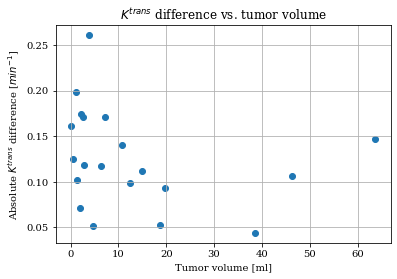

In [14]:
#Population-based AIF
'''
Plotting the difference in Ktrans values from average and voxelwise modelling versus the tumor volume
'''
f_vox = open('H:/data/Results/PopAIF/output_voxelwise_eroded.json')
vox_data = json.load(f_vox)

Kt_vox = []
kep_vox = []
ve_vox = []
vp_vox = []
tumor_vol = []

for i in range(0,len(vox_data)): 
    tumor_vol.append(vox_data[i]['tumor_volume'])
    Kt_vox.append(vox_data[i]['Ktrans']*60)
    kep_vox.append(vox_data[i]['kep']*60)
    ve_vox.append(vox_data[i]['ve'])
    vp_vox.append(vox_data[i]['vp'])

fig1 = plt.figure(1)
plt.rcParams.update({'font.family':'serif'})
plt.scatter(tumor_vol, Kt_vox)
plt.xlabel('Tumor volume [ml]')
plt.ylabel('Absolute $K^{trans}$ difference [$min^{-1}$]')
plt.title('$K^{trans}$ difference vs. tumor volume')
plt.grid()
fig1.savefig('H:/data/Results/PopAIF/tumorvol_vs_Ktdiff_popAIF.eps', bbox_inches='tight')


print('Average')
print('Kt:', np.array(Kt_vox).mean(), 'std:', np.array(Kt_vox).std())
print('kep:', np.array(kep_vox).mean(), 'std:', np.array(kep_vox).std())
print('ve:', np.array(ve_vox).mean(), 'std:', np.array(ve_vox).std())
print('vp:', np.array(vp_vox).mean(), 'std:', np.array(vp_vox).std()) 

Average
Kt: 0.1443376647509282 std: 0.058005986810581084
kep: 0.7807703134824271 std: 0.40349950308971555
ve: 0.3230383109997784 std: 0.13320608463918324
vp: 0.1990749206702573 std: 0.08426585524517909


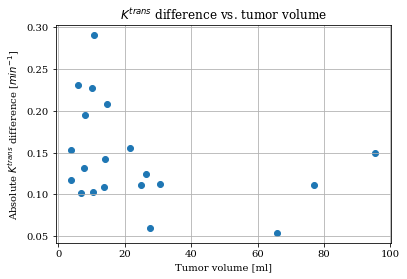

In [15]:
#Population-based AIF
'''
Plotting the difference in Ktrans values from average and voxelwise modelling versus the tumor volume
'''
f_vox = open('H:/data/Results/PopAIF/output_voxelwise_dilated.json')
vox_data = json.load(f_vox)

Kt_vox = []
kep_vox = []
ve_vox = []
vp_vox = []
tumor_vol = []

for i in range(0,len(vox_data)): 
    tumor_vol.append(vox_data[i]['tumor_volume'])
    Kt_vox.append(vox_data[i]['Ktrans']*60)
    kep_vox.append(vox_data[i]['kep']*60)
    ve_vox.append(vox_data[i]['ve'])
    vp_vox.append(vox_data[i]['vp'])

fig1 = plt.figure(1)
plt.rcParams.update({'font.family':'Times New Roman'})
plt.scatter(tumor_vol, Kt_vox)
plt.xlabel('Tumor volume [ml]')
plt.ylabel('Absolute $K^{trans}$ difference [$min^{-1}$]')
plt.title('$K^{trans}$ difference vs. tumor volume')
plt.grid()
fig1.savefig('H:/data/Results/PopAIF/tumorvol_vs_Ktdiff_popAIF.eps', bbox_inches='tight')


print('Average')
print('Kt:', np.array(Kt_vox).mean(), 'std:', np.array(Kt_vox).std())
print('kep:', np.array(kep_vox).mean(), 'std:', np.array(kep_vox).std())
print('ve:', np.array(ve_vox).mean(), 'std:', np.array(ve_vox).std())
print('vp:', np.array(vp_vox).mean(), 'std:', np.array(vp_vox).std()) 

In [194]:
from numpy import loadtxt
from imagedata import Series

pop_aif = loadtxt('H:/data/master endometrial data/Pop_AIF/aif_data3.csv', delimiter=',')

dce = Series('H:/data/master endometrial data/255/dce', 'time')
timelime=dce.timeline

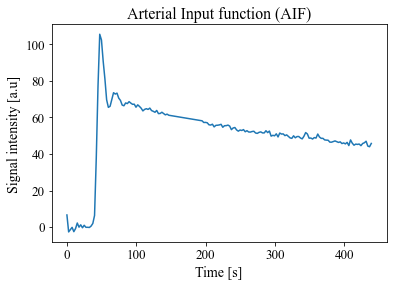

In [202]:
plt.rcParams['font.family'] = 'Times New Roman'

#legend_fontsize = 15
label_fontsize = 14
title_fontsize = 16
tick_size=13

plt.plot(timelime, pop_aif)
plt.title('Arterial Input function (AIF)', size=title_fontsize)
plt.xticks(size=tick_size)
plt.yticks(size=tick_size)
plt.ylabel('Signal intensity [a.u]', size=label_fontsize)
plt.xlabel('Time [s]', size = label_fontsize)
plt.savefig('H:/data/Results/aif_new.eps', bbox_inches='tight')

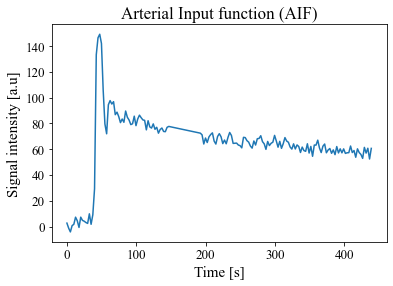

In [204]:
p255_aif = loadtxt("H:/data/master endometrial data/255/AIF_255.csv", delimiter=',')

plt.rcParams['font.family'] = 'Times New Roman'

label_fontsize = 15
title_fontsize = 17
tick_size=13

plt.plot(timelime, p255_aif)
plt.title('Arterial Input function (AIF)', size=title_fontsize)
plt.xticks(size=tick_size)
plt.yticks(size=tick_size)
plt.ylabel('Signal intensity [a.u]', size=label_fontsize)
plt.xlabel('Time [s]', size = label_fontsize)
plt.savefig('H:/data/Results/aif_new_255.eps', bbox_inches='tight')

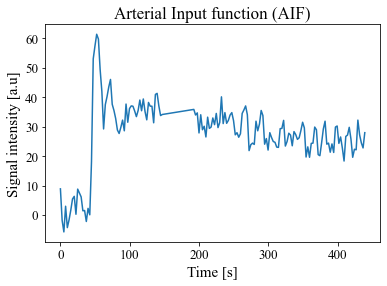

In [207]:
p198_aif = loadtxt("H:/data/master endometrial data/198/AIF_198.csv", delimiter=',')

plt.rcParams['font.family'] = 'Times New Roman'

label_fontsize = 15
title_fontsize = 17
tick_size=13

plt.plot(timelime, p198_aif)
plt.title('Arterial Input function (AIF)', size=title_fontsize)
plt.xticks(size=tick_size)
plt.yticks(size=tick_size)
plt.ylabel('Signal intensity [a.u]', size=label_fontsize)
plt.xlabel('Time [s]', size = label_fontsize)
plt.savefig('H:/data/Results/aif_new_198.eps', bbox_inches='tight')

In [210]:
auto = loadtxt("H:/data/master endometrial data/Kt_autoAIF.csv", delimiter=",")
pop = loadtxt("H:/data/master endometrial data/Kt_populationAIF.csv", delimiter=",")
manual = loadtxt("H:/data/master endometrial data/Kt_manualAIF.csv", delimiter=",")

In [271]:
2.6/100

0.026000000000000002